In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import pandas_datareader as web
import datetime as dt
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import talib
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,balanced_accuracy_score,f1_score,average_precision_score,precision_score,confusion_matrix
from keras.models import Sequential
import time
from keras.layers import Dense
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDRegressor, Lasso, ElasticNet, Perceptron, Ridge
from sklearn import svm
from tensorflow.keras import layers
from sklearn.feature_selection import RFE, SelectFromModel, SelectPercentile, mutual_info_regression, mutual_info_classif, SelectFpr, VarianceThreshold, RFECV
from sklearn.feature_selection import SelectKBest, f_classif, f_regression, chi2
#from yellowbrick.model_selection.importances import FeatureImportances
from xgboost import XGBRegressor

In [133]:
#Getting Data
start="1-1-1993"
end=dt.datetime.today()

#ticker="^GSPC"
#ticker="^BSESN"
#ticker="UBSG.SW"
ticker="^IXIC"
#ticker="^N225"
#ticker="EZA"

data=web.DataReader(ticker,"yahoo",start,end)
data=data[:]###

#Adding Pct Change/ Mov
data['Pct Change']=data['Close'].pct_change()*100
data['Movement']=None
m=0.2
for i in range(0, len(data['Pct Change'])):
    if data['Pct Change'].iloc[i]<-m:
        data['Movement'].iloc[i]=-1
    elif data['Pct Change'].iloc[i]>m:
        data['Movement'].iloc[i]=1
    else:
        data['Movement'].iloc[i]=0

/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [134]:
#Feature Engineering

#Basic Features
fdata=pd.DataFrame(index=data.index)
fdata['DReturn']=(data['Close']/data['Open']).apply(np.log)
fdata['Vol']=talib.OBV(data['Close'], data['Volume'])
fdata['High']=data['High'].apply(np.log)
fdata['Pct Change']=data['Pct Change']

period=np.arange(1,31)

#Avg
for i in range(1,200):
    fdata[f'MA {i}']=talib.MA(data['Close'], timeperiod=i, matype=0)    
for i in range(2, len(period)):
    fdata[f'SMA {i}'] = talib.SMA(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'DEMA {i}'] = talib.DEMA(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'TEMA {i}'] = talib.TEMA(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'EMA {i}'] = talib.EMA(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'STDDEV {i}'] = talib.STDDEV(data['Close'], timeperiod=i, nbdev=1)
for i in range(2, len(period)):
    fdata[f'SAREXT {i}'] = talib.SAREXT(data['High'], data['Low'], startvalue=i, offsetonreverse=0, 
                                        accelerationinitlong=0, accelerationlong=0, accelerationmaxlong=0, 
                                        accelerationinitshort=0, accelerationshort=0, accelerationmaxshort=0)
for i in range(2, len(period)):
    fdata[f'WMA {i}'] = talib.WMA(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['Price Volitility']=data['Pct Change'].rolling(i).mean()
    
#Price
fdata['AVGPRICE'] = talib.AVGPRICE(data['Open'],data['High'], data['Low'], data['Close']) 
fdata['MEDPRICE'] = talib.MEDPRICE(data['High'], data['Low'])
fdata['TYPPRICE'] = talib.TYPPRICE(data['High'], data['Low'], data['Close'])  
fdata['WCLPRICE'] = talib.TYPPRICE(data['High'], data['Low'], data['Close'])  

#Moementum
for i in range(2, len(period)):
    fdata[f'ADX {i}'] = talib.ADX(data['High'],data['Low'], data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'ADXR {i}'] = talib.ADXR(data['High'],data['Low'], data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'APO {i}'] = talib.APO(data['Close'], fastperiod=i, slowperiod=i*2, matype=0)
for i in range(2, len(period)):
    fdata[f'AROON D{i}'], fdata[f'AROON U{i}'] = talib.AROON(data['High'],data['Low'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'AROONOSC {i}'] = talib.AROONOSC(data['High'],data['Low'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'BOP {i}'] = talib.BOP(data['Open'], data['High'],data['Low'], data['Close'])
for i in range(2, len(period)):
    fdata[f'CCI {i}'] = talib.CCI(data['High'],data['Low'], data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'CMO {i}'] = talib.CMO(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'DX {i}'] = talib.DX(data['High'],data['Low'], data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'MACD MACD {i}'], fdata[f'MACD SIGNAL{i}'], fdata[f'MACD HIST{i}'] = talib.MACD(data['Close'], fastperiod=i, slowperiod=i*2, signalperiod=i)
for i in range(2, len(period)):
    fdata[f'MACDEXT MACD {i}'], fdata[f'MACDEXT SIGNAL{i}'], fdata[f'MACDEXT HIST{i}'] = talib.MACDEXT(data['Close'], fastperiod=i, fastmatype=0, slowperiod=i*2, 
                                                                                                       slowmatype=0, signalperiod=9, signalmatype=0)
for i in range(2, len(period)):
    fdata[f'MACDFIX MACD {i}'], fdata[f'MACDFIX SIGNAL{i}'], fdata[f'MACDFIX HIST{i}'] = talib.MACDFIX(data['Close'], signalperiod=9)
for i in range(2, len(period)):
    fdata[f'MFI {i}'] = talib.MFI(data['High'],data['Low'], data['Close'], data['Volume'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'MINUS_DI {i}'] = talib.MINUS_DI(data['High'],data['Low'], data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'MINUS_DM {i}'] = talib.MINUS_DM(data['High'],data['Low'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'MOM {i}'] = talib.MOM(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'PLUS_DI {i}'] = talib.PLUS_DI(data['High'],data['Low'], data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'PLUS_DM {i}'] = talib.PLUS_DM(data['High'],data['Low'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'PPO {i}'] = talib.PPO(data['Close'], fastperiod=i, slowperiod=i*2, matype=0)
for i in range(2, len(period)):
    fdata[f'ROC {i}'] = talib.ROC(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'ROCP {i}'] = talib.ROCP(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'ROCR {i}'] = talib.ROCR(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'ROCR100 {i}'] = talib.ROCR100(data['Close'], timeperiod=i)
for i in range(8, len(period), 6):
    fdata[f'RSI {i}'] = talib.RSI(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'STOCH SLOWK {i}'], fdata[f'STOCH SLOWD {i}'] = talib.STOCH(data['High'],data['Low'], data['Close'], 
                                                                       fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
for i in range(2, len(period)):
    fdata[f'STOCHF FASTK {i}'], fdata[f'STOCHF FASTD {i}'] = talib.STOCHF(data['High'],data['Low'], data['Close'], 
                                                                          fastk_period=i, fastd_period=round(i/2), fastd_matype=0)
for i in range(2, len(period)):
    fdata[f'STOCHRSI FASTK {i}'], fdata[f'STOCHRSI FASTD {i}'] = talib.STOCHRSI(data['Close'], timeperiod=i*3, 
                                                                                fastk_period=round(i/2), fastd_period=round(i/3), fastd_matype=0)
for i in range(2, len(period)):
    real = talib.TRIX(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'ULTOSC {i}'] = talib.ULTOSC(data['High'],data['Low'], data['Close'], timeperiod1=i, timeperiod2=i*2, timeperiod3=i*3)
for i in range(2, len(period)):
    fdata[f'WILLR {i}'] = talib.WILLR(data['High'],data['Low'], data['Close'], timeperiod=i)

#Volitility
for i in range(2, len(period)):
    fdata[f'ATR {i}'] = talib.ATR(data['High'],data['Low'], data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'NATR {i}'] = talib.NATR(data['High'],data['Low'], data['Close'], timeperiod=i)  
fdata['TRANGE'] = talib.TRANGE(data['High'],data['Low'], data['Close'])

#Cycle Indicators
fdata['HT_DCPERIOD'] = talib.HT_DCPERIOD(data['Close'])
fdata['HT_DCPHASE'] = talib.HT_DCPHASE(data['Close'])
fdata['HT_TRENDMODE'] = talib.HT_TRENDMODE(data['Close'])

#Statistic Functions
for i in range(2, len(period)):
    fdata[f'BETA {i}'] = talib.BETA(data['High'],data['Low'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'CORREL {i}'] = talib.CORREL(data['High'],data['Low'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'LINEARREG {i}'] = talib.LINEARREG(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'LINEARREG_SLOPE {i}'] = talib.LINEARREG_SLOPE(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'STDDEV {i}'] = talib.STDDEV(data['Close'], timeperiod=i, nbdev=1)
for i in range(2, len(period)):
    fdata[f'TSF {i}'] = talib.TSF(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata[f'VAR {i}'] = talib.VAR(data['Close'], timeperiod=i, nbdev=1)

#Volume Indicator Functions
for i in range(2, len(period)):
    fdata[f'ADOSC {i}'] = talib.ADOSC(data['High'], data['Low'], data['Close'], data['Volume'], fastperiod=i, slowperiod=i*2)
fdata['AD']=talib.AD(data['High'], data['Low'], data['Close'], data['Volume'])
fdata['OBV']=talib.OBV(data['Close'], data['Volume'])

len(fdata.columns)

1730

In [135]:
#Last nan
lnan=0
for col in range(len(fdata.columns)):
    if fdata.reset_index(drop=True).iloc[:,col].first_valid_index()>lnan:
        lnan=fdata.iloc[:,col].reset_index(drop=True).first_valid_index()

In [136]:
target='Pct Change'

In [36]:
#Feature Selection with scikit regr SPY
selector = SelectKBest(f_regression, k=5)
sf = selector.fit_transform(fdata[lnan:][:-1], data[lnan:][target].shift(-1).dropna())
fnum = selector.get_support(indices=True)

/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

In [54]:
#Feature Selection with scikit regr SPY
selector = SelectKBest(mutual_info_regression, k=5)
sf = selector.fit_transform(fdata[lnan:][:-1], data[lnan:][target].shift(-1).dropna())
fnum = selector.get_support(indices=True)

KeyboardInterrupt: 

In [94]:
#Feature Selection with scikit regr SPY
selector = SelectKBest(f_classif, k=5)
sf = selector.fit_transform(fdata[lnan:][:-1], data[lnan:][target].shift(-1).dropna())
fnum = selector.get_support(indices=True)

/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 343  344  345  346  347  348  349  350  351  352  353  354  355  356
  357  358  359  360  361  362  363  364  365  366  367  368  369  370
 1360 1361] are constant.
  UserWarning)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [93]:
#Feature Selection with scikit regr SPY
selector = SelectKBest(mutual_info_classif, k=5)
sf = selector.fit_transform(fdata[lnan:][:-1], data[lnan:][target].shift(-1).dropna())
fnum = selector.get_support(indices=True)

ValueError: Unknown label type: 'continuous'

In [85]:
#Feature Selection with scikit regr SPY
selector = RFECV(LinearRegression(),step=100,min_features_to_select=15)
sf = selector.fit_transform(fdata[lnan:][:-1], data[lnan:][target].shift(-1).dropna())
fnum = selector.get_support(indices=True)

In [90]:
#Feature Selection with scikit models
st = time.time()
model = SelectFromModel(estimator=LinearRegression(), max_features=5).fit(fdata[lnan:][:-1], data[lnan:][target].shift(-1).dropna())
fnum=model.get_support(indices=True)
print("Time Taken: ",time.time()-st)

Time Taken:  3.5021278858184814


In [89]:
#Feature Selection with scikit models
st = time.time()
model = SelectFromModel(estimator=Ridge(), max_features=5).fit(fdata[lnan:][:-1], data[lnan:][target].shift(-1).dropna())
fnum=model.get_support(indices=True)
print("Time Taken: ",time.time()-st)

KeyboardInterrupt: 

Index(['ADOSC 12', 'MINUS_DM 5', 'ADOSC 15', 'ADOSC 22', 'MINUS_DI 6',
       'PLUS_DI 5', 'PLUS_DM 27', 'ADOSC 19', 'ADOSC 26', 'PLUS_DM 26',
       'PLUS_DI 8', 'MINUS_DM 10', 'PLUS_DI 9', 'PPO 8', 'PLUS_DM 17',
       'MINUS_DM 11', 'PLUS_DM 9', 'PLUS_DM 16', 'CMO 6', 'ADOSC 18'],
      dtype='object')

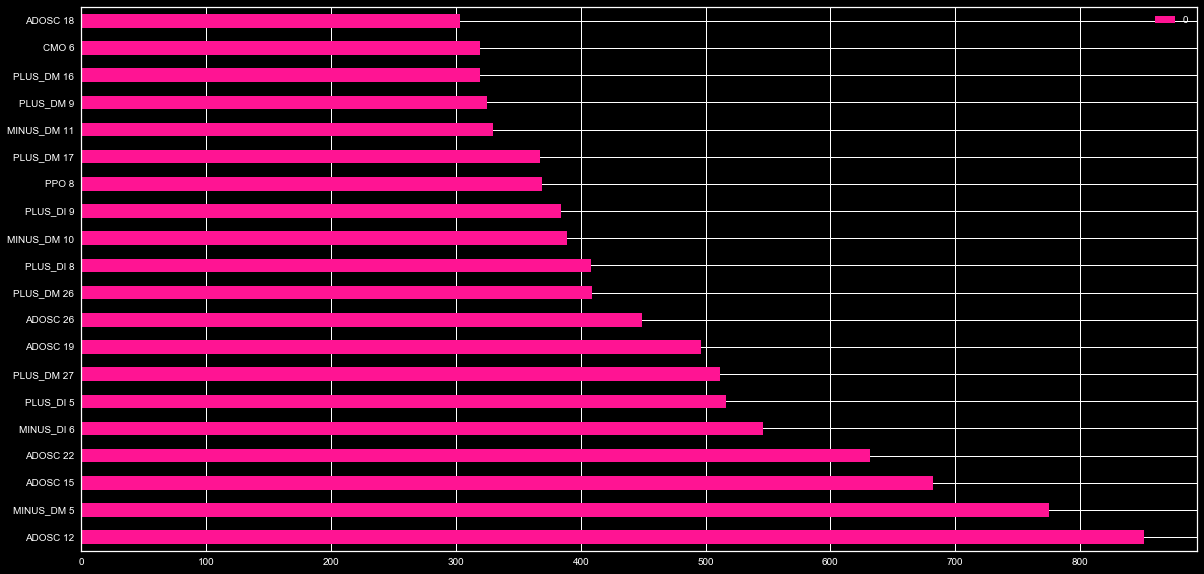

In [776]:
mf = pd.DataFrame(model.coef_, index=X.columns)
f=mf.nlargest(20, 0)
f.plot(kind='barh', color='deeppink', figsize=(20,10))
f=f.index
f

In [137]:
#Data Splitting
#X=fdata[f][lnan:]
#X=fdata[mf][lnan:]
#X=fdata[lnan:]
#X=fdata[['ROC-2','ROC-3','ROCR-2','ROCR-3','ROCP-2','ROCP-3','MOM-2', 'ROCR100-2']]#.dropna()
X=fdata[lnan:].iloc[:, fnum[:]].astype('float')
#X=fdata[lnan:][['MOM 10', 'MACD HIST4', 'CORREL 3', 'PPO 6', 'MACDEXT HIST5','MACD HIST6', 'MOM 17', 'MOM 13', 'MACDEXT HIST6', 'MACDEXT HIST4']]

tmrw=X[-1:]
X=X[:-1]

y=data[target][lnan:].shift(-1).dropna().astype('float')

splitp=int(len(X)*0.75)

X_train= X[:splitp]
X_test = X[splitp:]
y_train= y[:splitp]
y_test= y[splitp:]

#y_train=y_train.astype('int')
#y_test=y_test.astype('int')
print(len(X_test.columns))

model=MLPRegressor()
model.fit(X_train, y_train)
pred=model.predict(X_test)
tpred=model.predict(tmrw)
pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])
tpred=pd.DataFrame(data=tpred, index=tmrw.index)

5


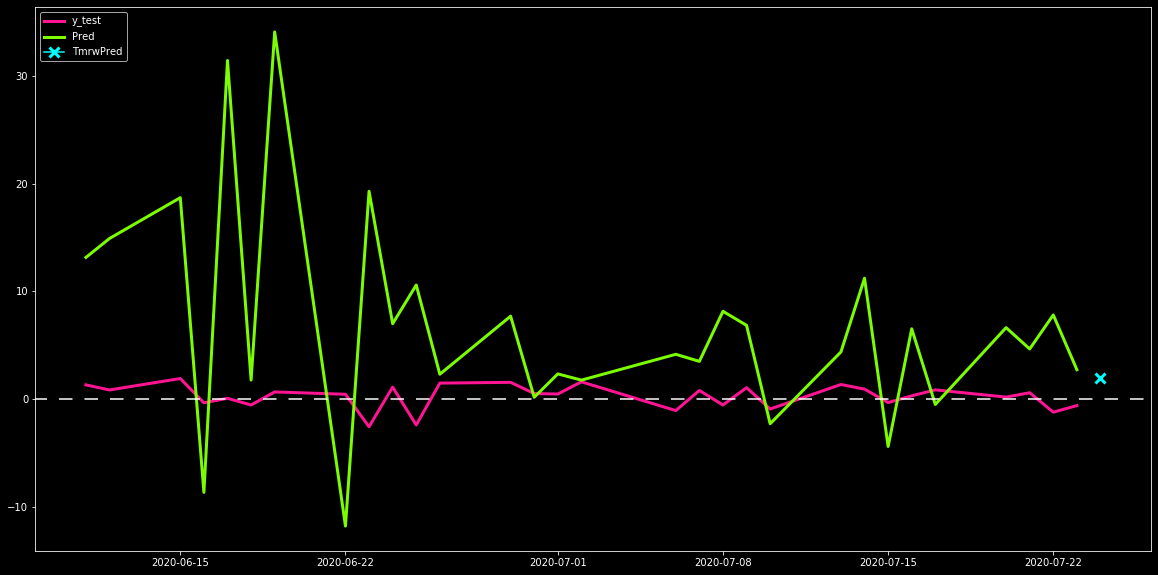

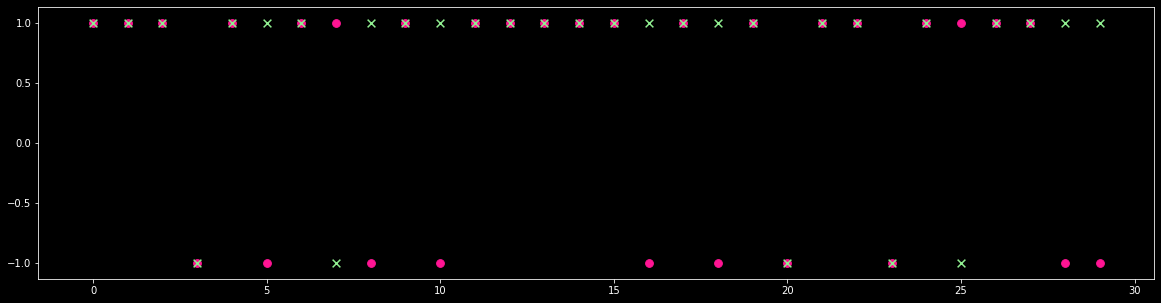

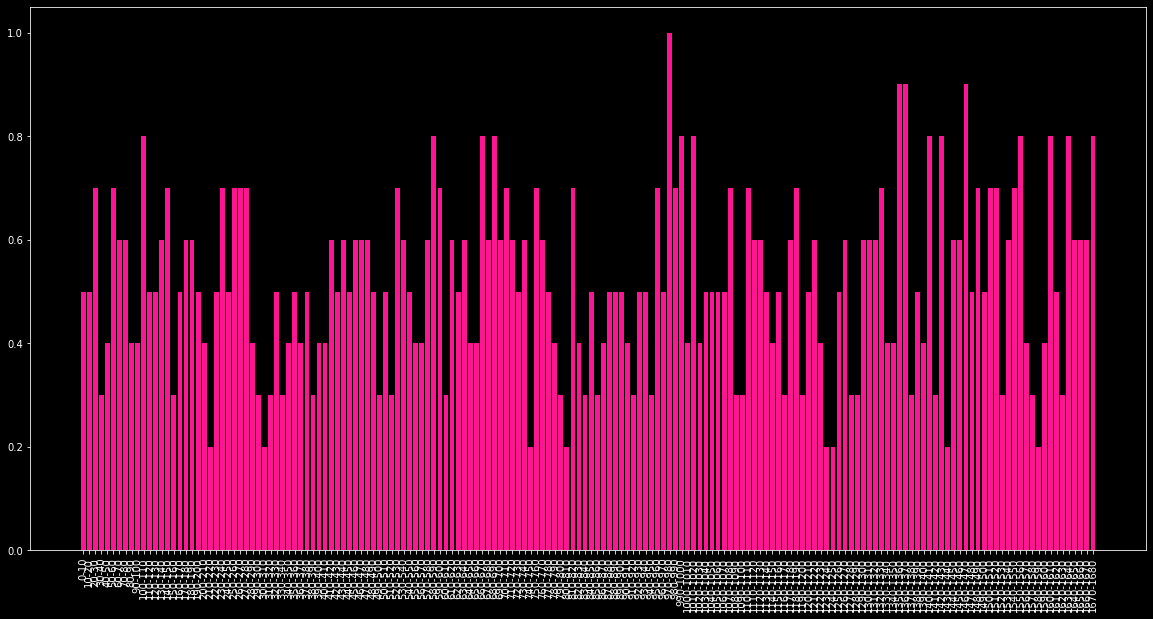

4.33683342826233 -192.43860445354997 0.5181008902077151 0.1715897060166616 

In [96]:
#Plot Pred

le=30

plt.figure(figsize=(20,10))
plt.plot(y_test[-le:],label="y_test",color="deeppink",lw=3)
plt.plot(pred['Prediction'][-le:],color="lawngreen", lw=3,label="Pred")
plt.plot(tpred,marker='x',ms=10,label="TmrwPred", mew=3, color='aqua')
#plt.plot(data[target][-le:], lw=2,label="RealTarget", color='yellow')
plt.axhline(0, linestyle=(1,(9,8)), c='w')
plt.legend(loc='upper left')
plt.show()

#Error
#conf=confusion_matrix(y_test, pred, labels=[-1,0,1])
#confm=pd.DataFrame(data=conf, index=[-1,0,1], columns=[-1,0,1])
#confm
#accuracy_score(y_test, pred['Prediction'])
ym=pd.DataFrame(index=y_test.index)
ym['Movement']=None
for i in range(len(y_test)):
    if y_test.iloc[i]>0:
        ym['Movement'].iloc[i]=1
    elif y_test.iloc[i]<0:
        ym['Movement'].iloc[i]=-1
    else:
        ym['Movement'].iloc[i]=0

pm=pd.DataFrame(index=pred.index)
pm['Movement']=None
for i in range(len(pred['Prediction'])):
    if pred['Prediction'].iloc[i]>0:
        pm['Movement'].iloc[i]=1
    elif pred['Prediction'].iloc[i]<0:
        pm['Movement'].iloc[i]=-1
    else:
        pm['Movement'].iloc[i]=0
        
        
        
plt.figure(figsize=(20,5))
plt.scatter(np.arange(len(ym[-le:])),ym[-le:], color='deeppink', marker='o', s=60)
plt.scatter(np.arange(len(pm[-le:])),pm[-le:], color='lightgreen', marker='x', s=60)
plt.show()


accs = {}
for i in np.arange(0,(len(pm))-10,10):
    score=accuracy_score(pm['Movement'][i:i+10].astype('int'), ym['Movement'][i:i+10].astype('int'))
    accs.update({f"{i}-{i+10}":score})

plt.figure(figsize=(20,10))
plt.bar(range(len(accs)), list(accs.values()), align='center', color='deeppink')
plt.xticks(range(len(accs)), list(accs.keys()))
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(accs), 1))
plt.show()

d=[mae(y_test, pred['Prediction']),r2_score(y_test, pred['Prediction']),accuracy_score(pm[:-1].astype('int'), ym[:-1].astype('int')),np.std(list(accs.values()))]
#print("MAE: ",mae(y_test, pred['Prediction']))
#print("r2_score: ",r2_score(y_test, pred['Prediction']))
#print("Accuracy Score:",accuracy_score(pm[:-1].astype('int'), ym[:-1].astype('int')))
#print("Deviation:",np.std(list(accs.values())))

for i in d:
    print(i, end=' ')

In [294]:
model=LinearRegression()
model.fit(X_train, y_train)
pred=model.predict(X_test)
tpred=model.predict(tmrw)
pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])
tpred=pd.DataFrame(data=tpred, index=tmrw.index)

In [ ]:
model=svm.SVR('linear')
model.fit(X_train, y_train)
pred=model.predict(X_test)
tpred=model.predict(tmrw)
pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])
tpred=pd.DataFrame(data=tpred, index=tmrw.index)

In [ ]:
#Feature Selection Using Random Forest
st = time.time()
X=fdata[lnan:]
X=X[:-1].dropna()
y=data[target][lnan:].shift(-1).dropna().astype('float')
splitp=int(len(X)*0.75)
X_train= X[:splitp]
X_test = X[splitp:]
y_train= y[:splitp]
y_test= y[splitp:]
#y_train=y_train.astype('int')
#y_test=y_test.astype('int')
X_test.columns
model=RandomForestClassifier()#n_estimators=500, max_leaf_nodes=50, max_depth=50, min_samples_split=50,n_jobs=-1)
model.fit(X_train, y_train)
pred=model.predict(X_test)
pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])
mf = pd.DataFrame(model.feature_importances_, index=X.columns)
print(model.coef_)
f=mf.nlargest(20, 0)
f.plot(kind='barh', color='deeppink', figsize=(20,10))
print("Time Taken: ",time.time()-st)

In [32]:
model=RandomForestRegressor(n_estimators=40, bootstrap=False, min_samples_leaf=25)#n_estimators=500, max_leaf_nodes=50, max_depth=50, min_samples_split=50,n_jobs=-1)
model.fit(X_train, y_train)
pred=model.predict(X_test)
tpred=model.predict(tmrw)
pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])
tpred=pd.DataFrame(data=tpred, index=tmrw.index)

In [39]:
model=RandomForestRegressor()
model.fit(X_train, y_train)
pred=model.predict(X_test)
tpred=model.predict(tmrw)
pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])
tpred=pd.DataFrame(data=tpred, index=tmrw.index)

In [58]:
model=RandomForestClassifier()

model.fit(X_train.astype('int'), y_train.astype('int'))
pred=model.predict(X_test)
tpred=model.predict(tmrw)
pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])
tpred=pd.DataFrame(data=tpred, index=tmrw.index)

In [299]:
model=KNeighborsRegressor()

model.fit(X_train.astype('int'), y_train.astype('int'))
pred=model.predict(X_test)
tpred=model.predict(tmrw)
pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])
tpred=pd.DataFrame(data=tpred, index=tmrw.index)

In [ ]:
#activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,beta_2=0.999, early_stopping=False
#, epsilon=1e-08,hidden_layer_sizes=(100,), learning_rate='constant',learning_rate_init=0.001, max_fun=15000, max_iter=200,momentum=0.9, n_iter_no_change=10
#, nesterovs_momentum=True,power_t=0.5, random_state=2, solver='adam',tol=0.0001, validation_fraction=0.1,shuffle=True ,verbose=False,warm_start=False
model=MLPRegressor()
model.fit(X_train, y_train)
pred=model.predict(X_test)
tpred=model.predict(tmrw)
pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])
tpred=pd.DataFrame(data=tpred, index=tmrw.index)

In [87]:
model=MLPClassifier()
model.fit(X_train, y_train)
pred=model.predict(X_test)
tpred=model.predict(tmrw)
pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])
tpred=pd.DataFrame(data=tpred, index=tmrw.index)

ValueError: Unknown label type: (array([ 466.82998657,  469.5       ,  468.45001221, ..., 1761.64001465,
       1767.93005371, 1762.9699707 ]),)

In [467]:
param=[{
            
             'criterion': ['mse', 'mae'],
             'max_features': ['auto', 'sqrt', 'log2'],
            }]
    
model=GridSearchCV(RandomForestRegressor(n_jobs=-1), param)#n_estimators=500, max_leaf_nodes=50, max_depth=50, min_samples_split=50,n_jobs=-1)
model.fit(X_train, y_train)

KeyboardInterrupt: 

In [472]:
model=model.best_params_
pred=model.predict(X_test)
tpred=model.predict(tmrw)
pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])
tpred=pd.DataFrame(data=tpred, index=tmrw.index)

AttributeError: 'RandomForestRegressor' object has no attribute 'best_params_'

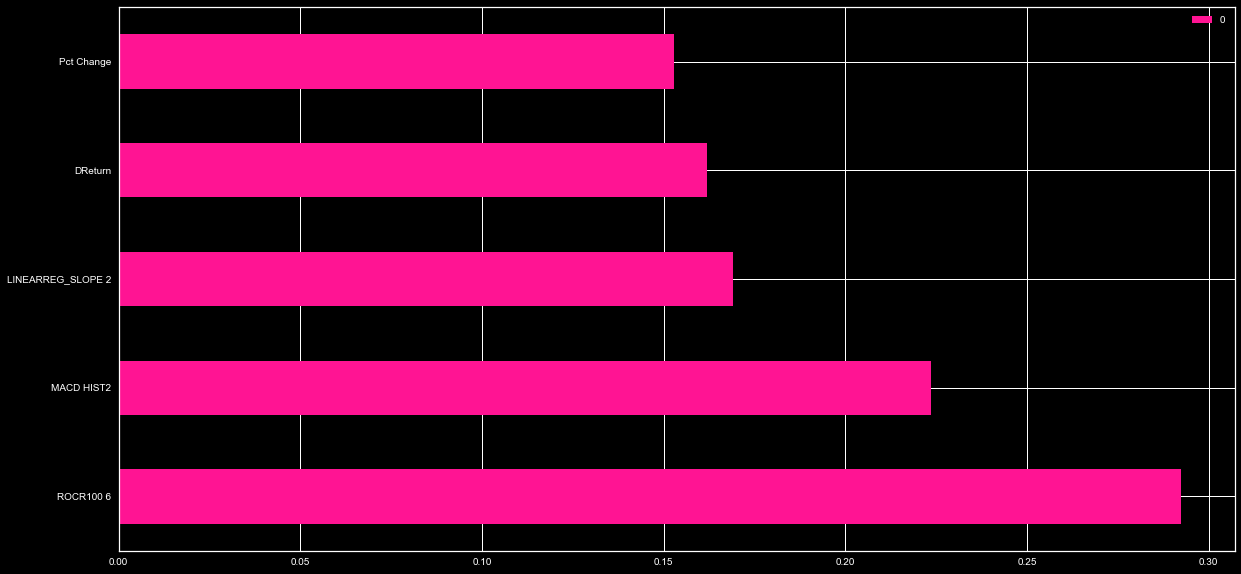

In [133]:
mf = pd.DataFrame(model.feature_importances_, index=X.columns)
mf.nlargest(20, 0).plot(kind='barh', color='deeppink', figsize=(20,10))

In [207]:
model = Sequential([
    layers.LSTM(20, input_shape=(len(X_train.keys()) ,len(X_train.index)), return_sequences=True)#,
    #layers.LSTM(20),
    #layers.Dense(1, activation='relu')
  ])

model.compile(loss='mse')#,
            #optimizer='adam',
            #metrics=['mae, mse'])

model.fit(X_train, y_train, epochs=20)
pred=model.predict(X_test)
tpred=model.predict(tmrw)
pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])
tpred=pd.DataFrame(data=tpred, index=tmrw.index)

ModuleNotFoundError: No module named 'tensorflow.python.keras.engine.base_layer_v1'

In [83]:
#Pred
print("Tomorrow's Prediction:", tpred.iloc[0].item())

Tomorrow's Prediction: 3219.9998702783164


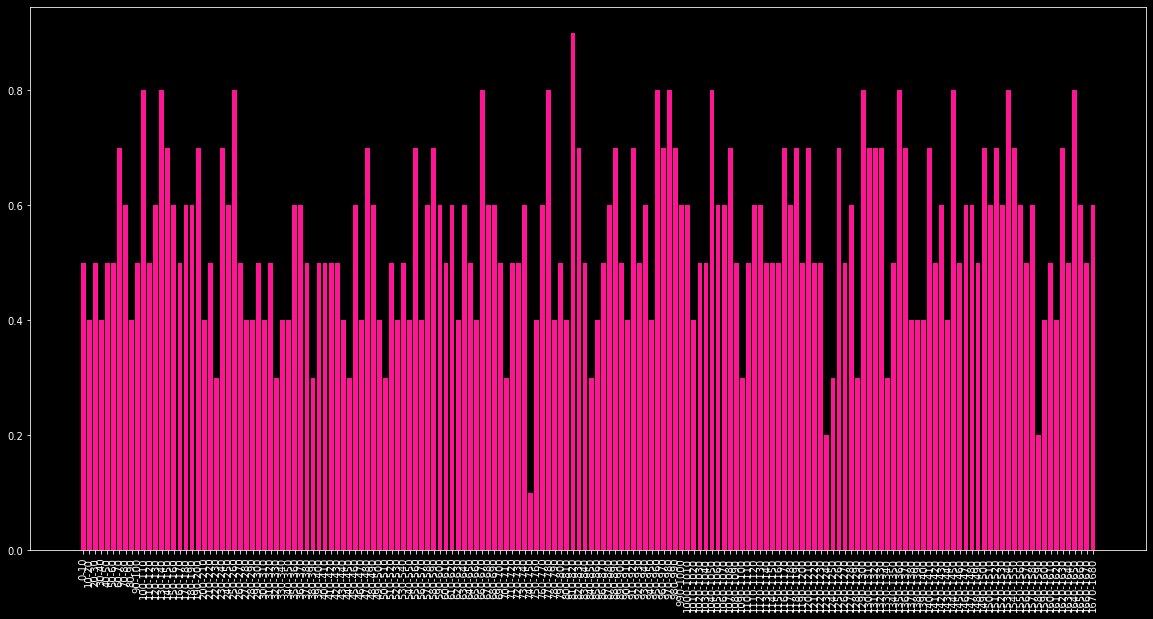

Deviation: 0.14492061318868385


In [44]:
accs = {}
for i in np.arange(0,(len(pm))-10,10):
    score=accuracy_score(pm['Movement'][i:i+10].astype('int'), ym['Movement'][i:i+10].astype('int'))
    accs.update({f"{i}-{i+10}":score})

plt.figure(figsize=(20,10))
plt.bar(range(len(accs)), list(accs.values()), align='center', color='deeppink')
plt.xticks(range(len(accs)), list(accs.keys()))
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(accs), 1))
plt.show()
print("Deviation:",np.std(list(accs.values())))

In [298]:
accuracy_score(pm[-11:-1].astype('int'), ym[-11:-1].astype('int'))

0.6

In [39]:
ym=pd.DataFrame(index=y_test.index)
ym['Movement']=None
for i in range(len(y_test)):
    if y_test.iloc[i]>0:
        ym['Movement'].iloc[i]=1
    elif y_test.iloc[i]<0:
        ym['Movement'].iloc[i]=-1
    else:
        ym['Movement'].iloc[i]=0
ym

Movement
Date               
2013-11-05        1
2013-11-06       -1
2013-11-07        1
2013-11-08        1
2013-11-11       -1
...             ...
2020-07-10       -1
2020-07-13        1
2020-07-14        1
2020-07-15       -1
2020-07-16        1

[1685 rows x 1 columns]

In [40]:
pm=pd.DataFrame(index=pred.index)
pm['Movement']=None
for i in range(len(pred['Prediction'])):
    if pred['Prediction'].iloc[i]>0:
        pm['Movement'].iloc[i]=1
    elif pred['Prediction'].iloc[i]<0:
        pm['Movement'].iloc[i]=-1
    else:
        pm['Movement'].iloc[i]=0
pm,ym

(           Movement
 Date               
 2013-11-05       -1
 2013-11-06       -1
 2013-11-07       -1
 2013-11-08        1
 2013-11-11       -1
 ...             ...
 2020-07-10        1
 2020-07-13       -1
 2020-07-14       -1
 2020-07-15        1
 2020-07-16       -1
 
 [1685 rows x 1 columns],
            Movement
 Date               
 2013-11-05        1
 2013-11-06       -1
 2013-11-07        1
 2013-11-08        1
 2013-11-11       -1
 ...             ...
 2020-07-10       -1
 2020-07-13        1
 2020-07-14        1
 2020-07-15       -1
 2020-07-16        1
 
 [1685 rows x 1 columns])

In [41]:
accuracy_score(pm.astype('int'), ym.astype('int'))

0.4688427299703264

/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

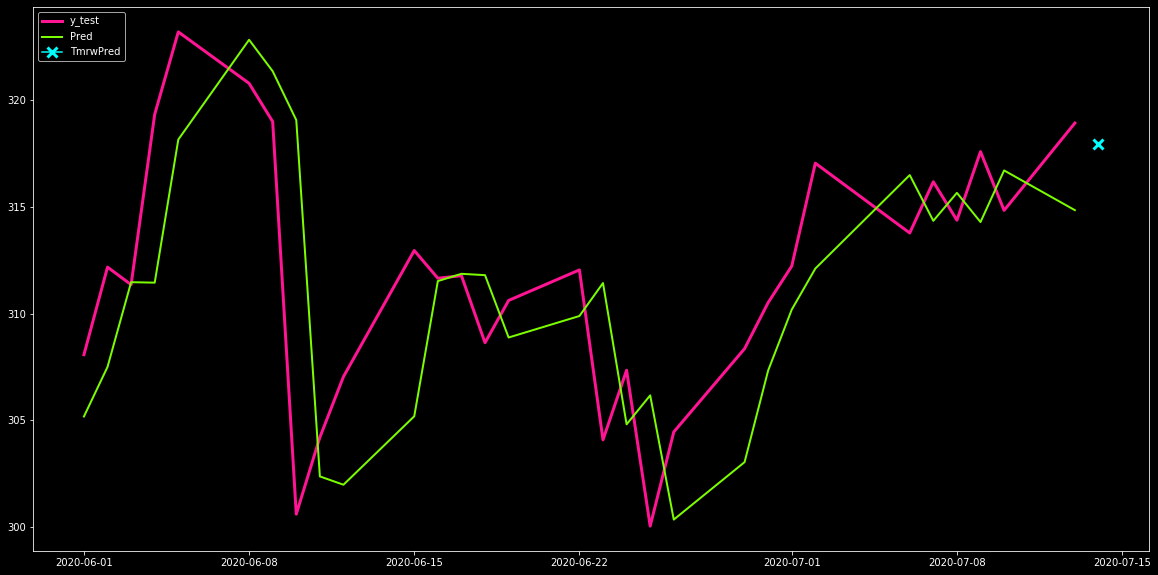

Error in %:  3.8687617341953815 2


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

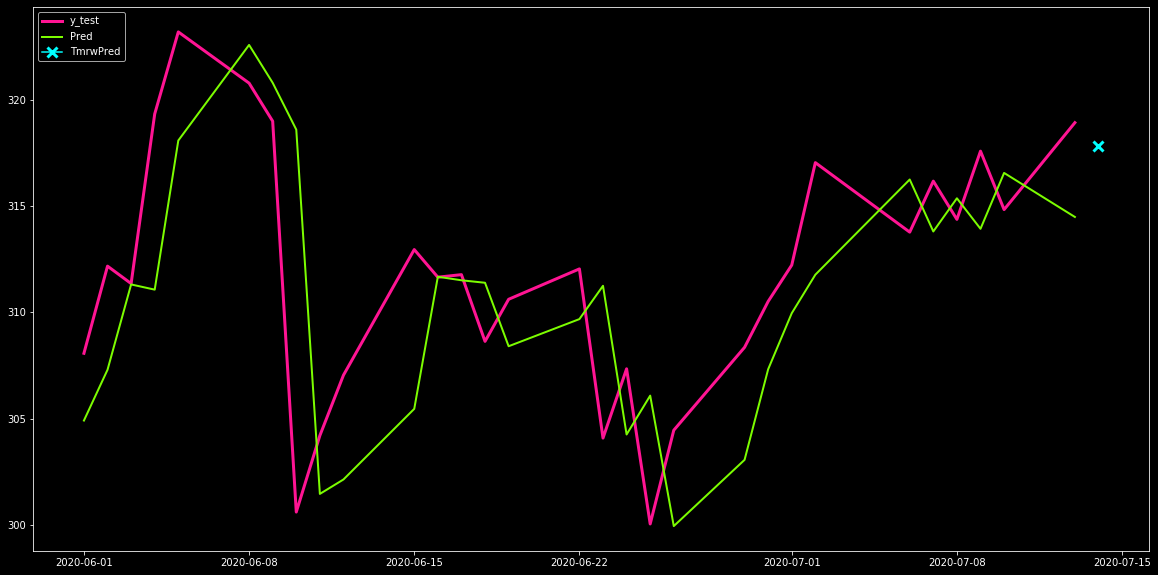

Error in %:  3.9430181252706498 3


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

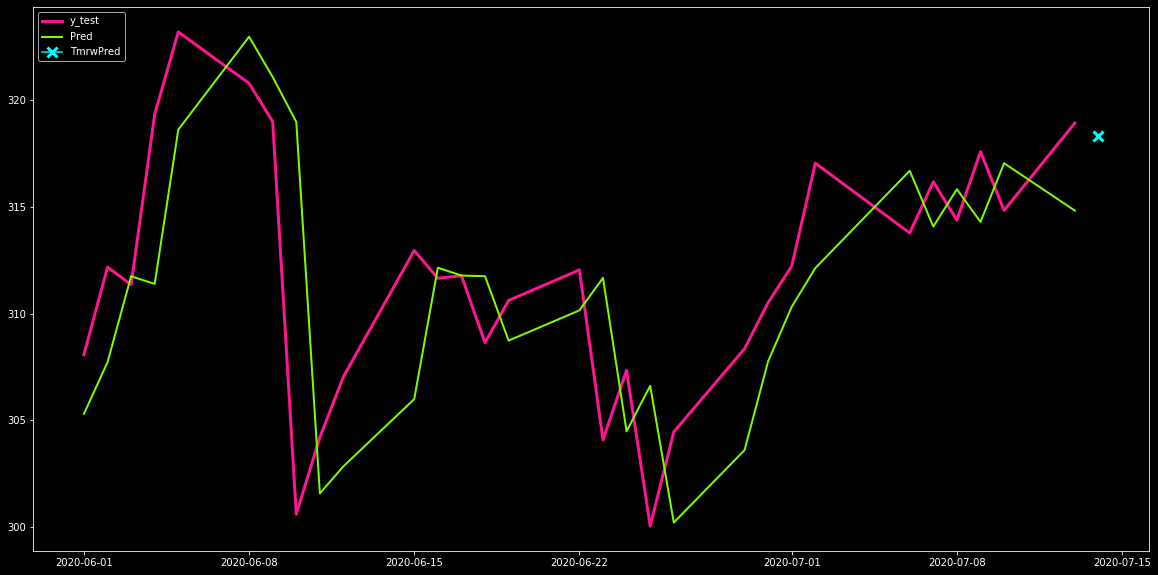

Error in %:  3.8537553511264395 4


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

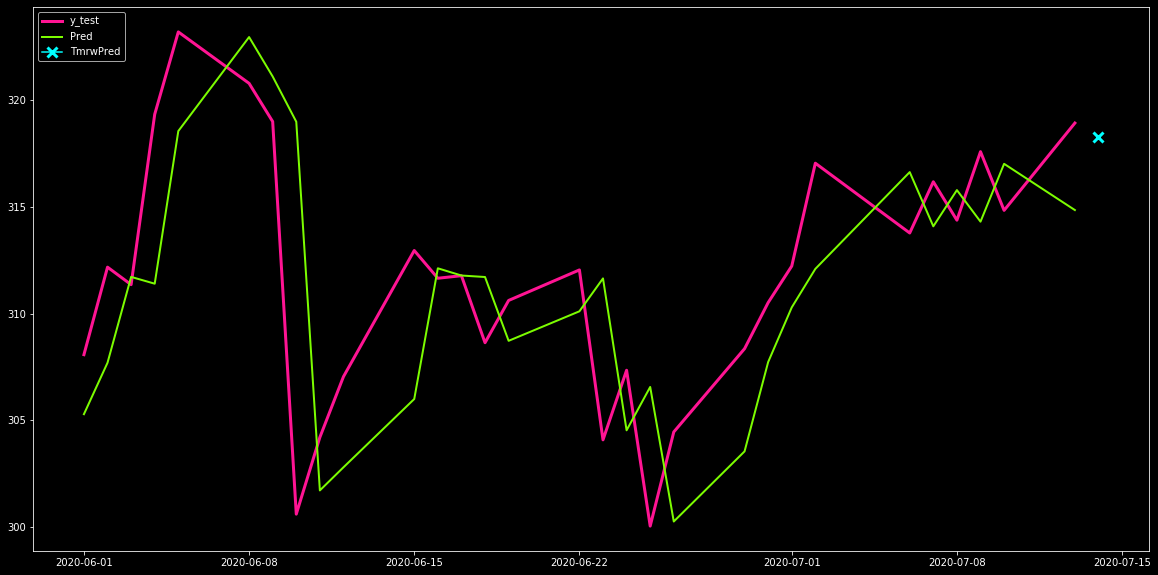

Error in %:  3.846614435441787 5


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

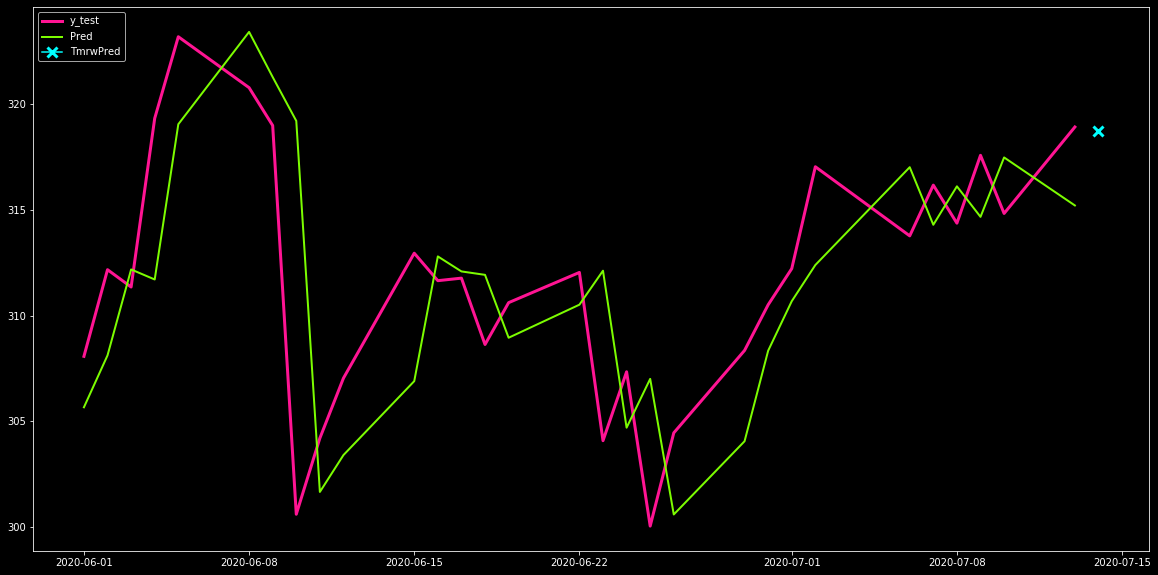

Error in %:  3.769637010328504 6


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

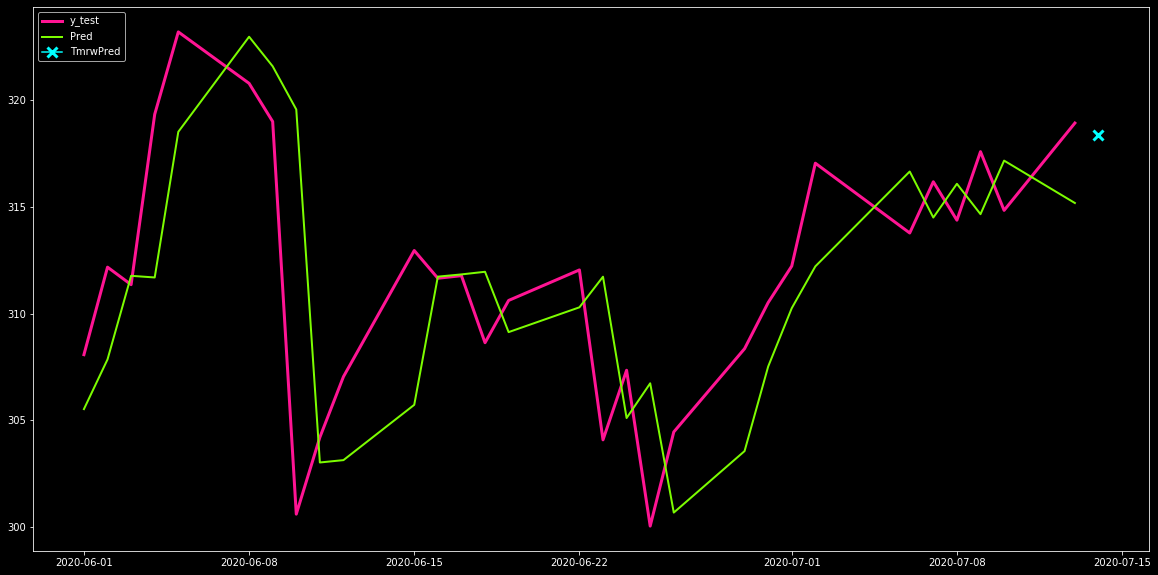

Error in %:  3.751990429481265 7


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

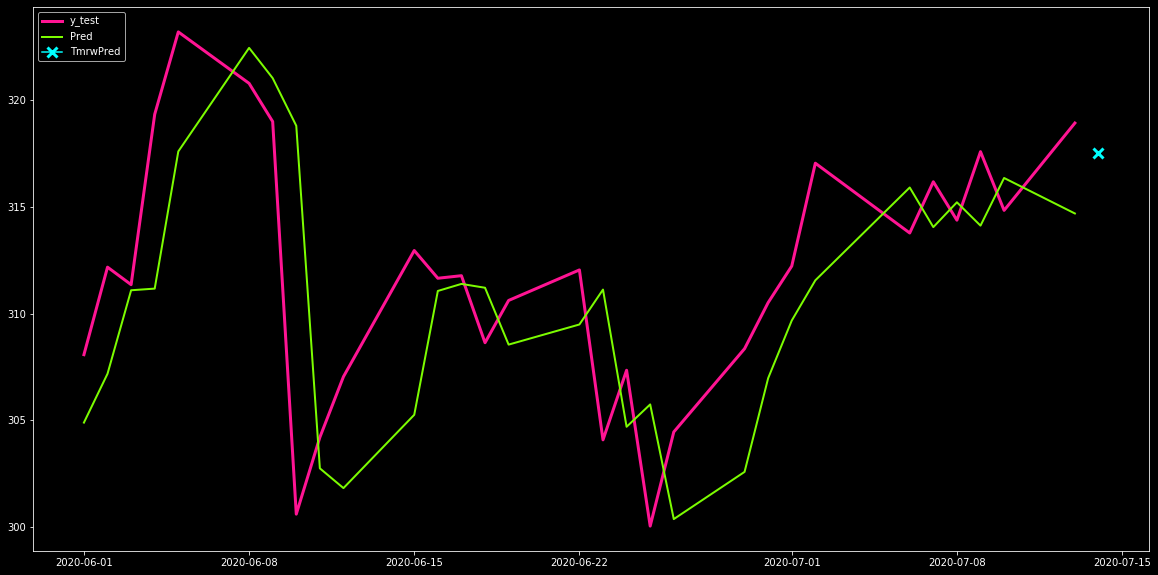

Error in %:  3.9257224686527876 8


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

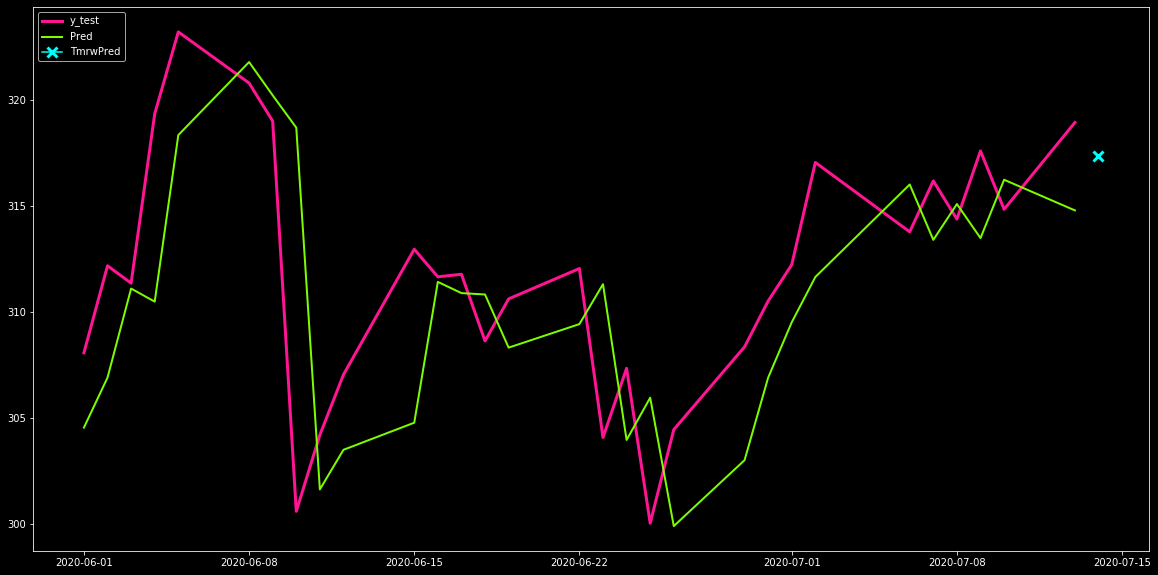

Error in %:  3.9673692415732793 9


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

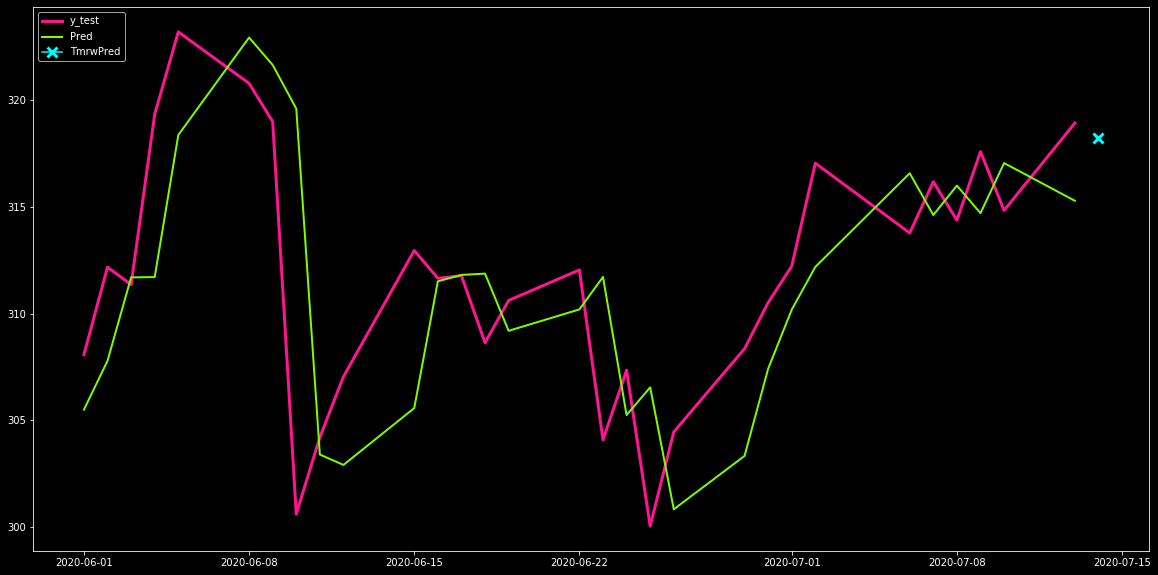

Error in %:  3.7385241275748795 10


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

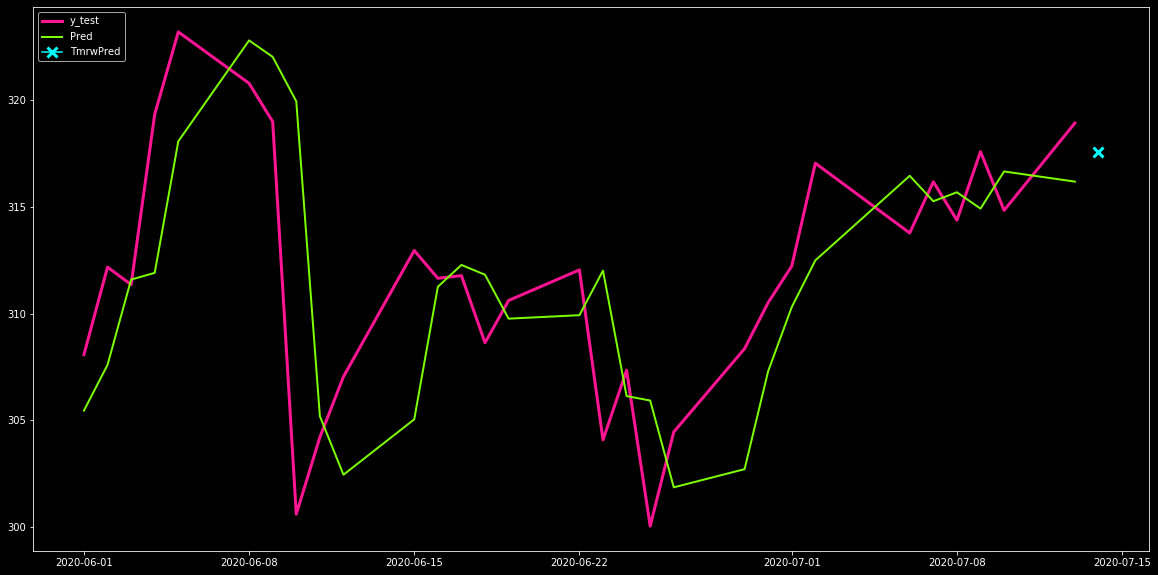

Error in %:  3.666445993857508 11


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

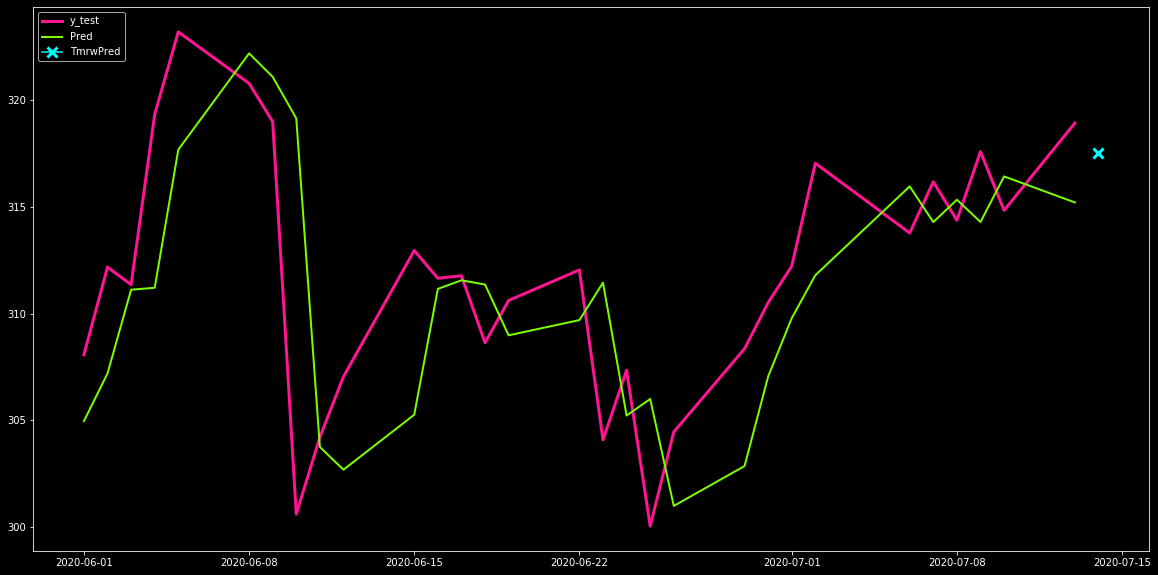

Error in %:  3.7708943640383743 12


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

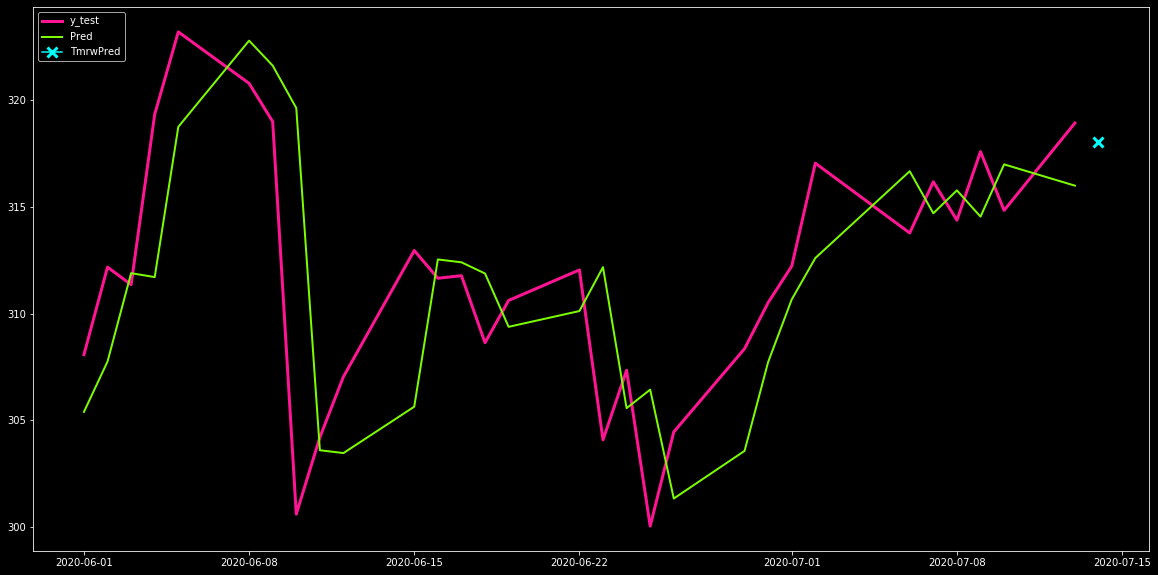

Error in %:  3.6541810911084514 13


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

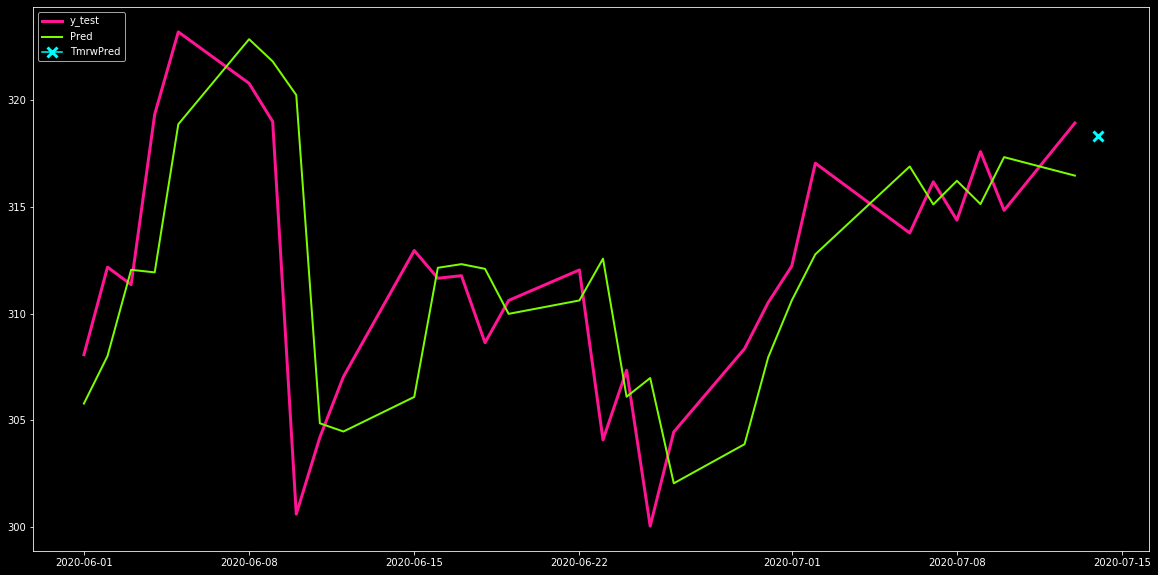

Error in %:  3.515269181854738 14


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

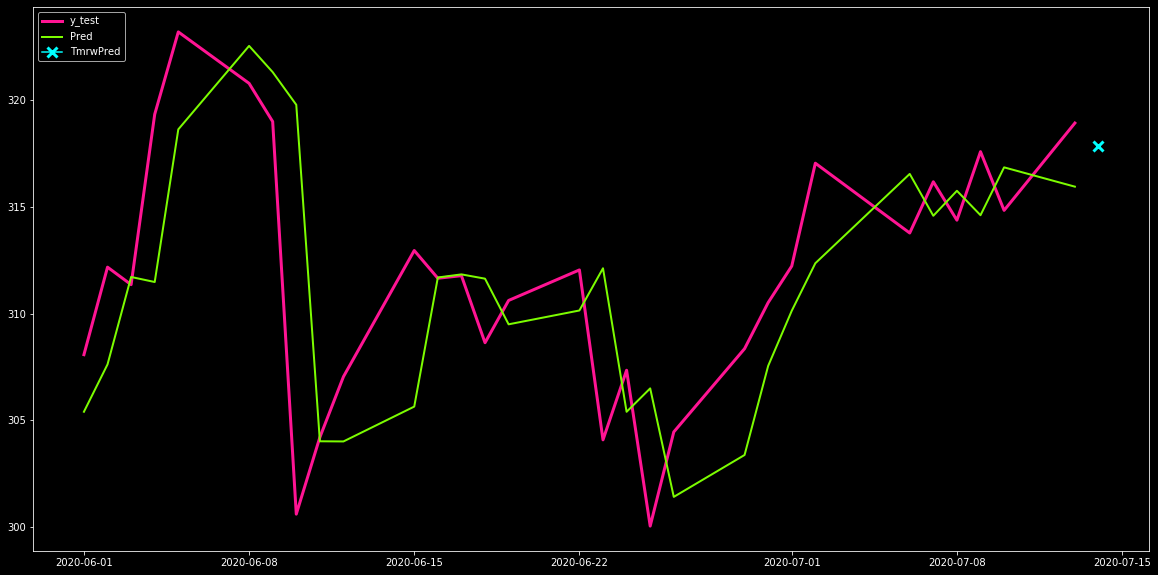

Error in %:  3.5938840134733026 15


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

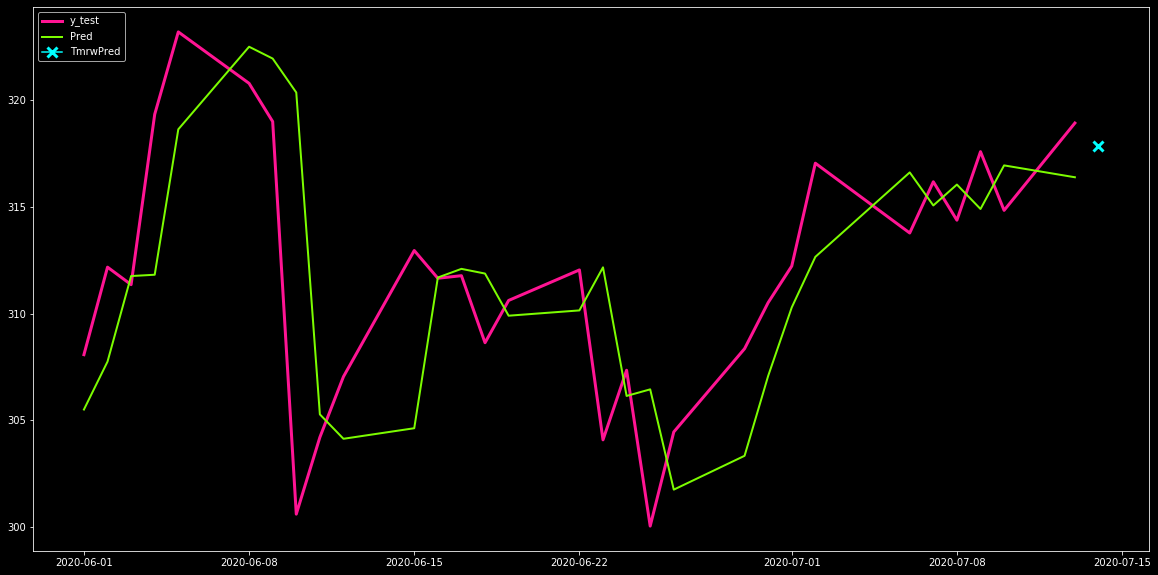

Error in %:  3.6174407037384393 16


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

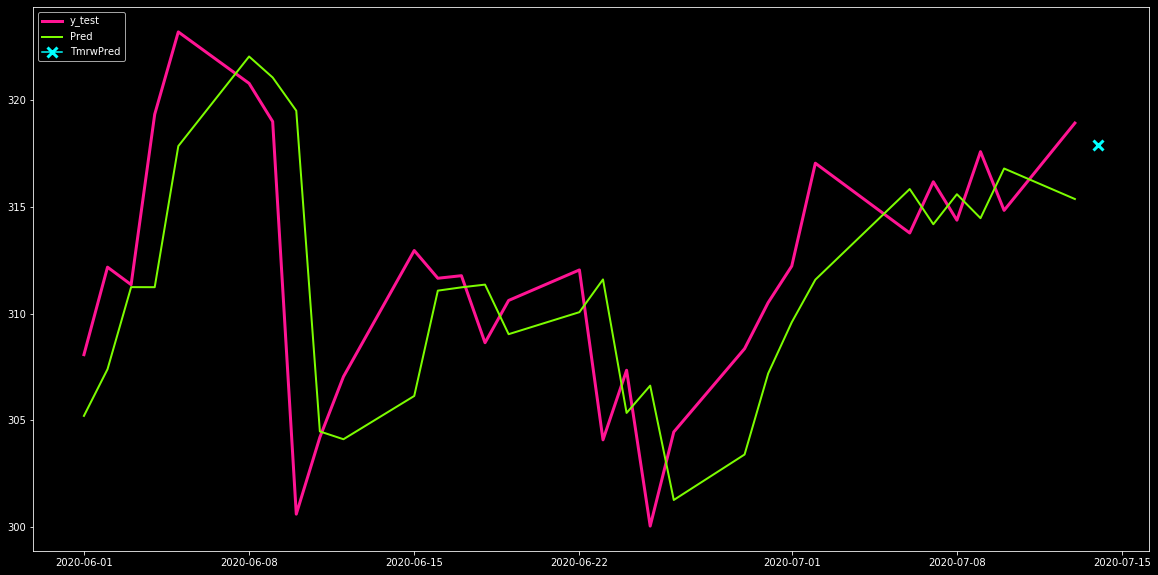

Error in %:  3.6802190486294157 17


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

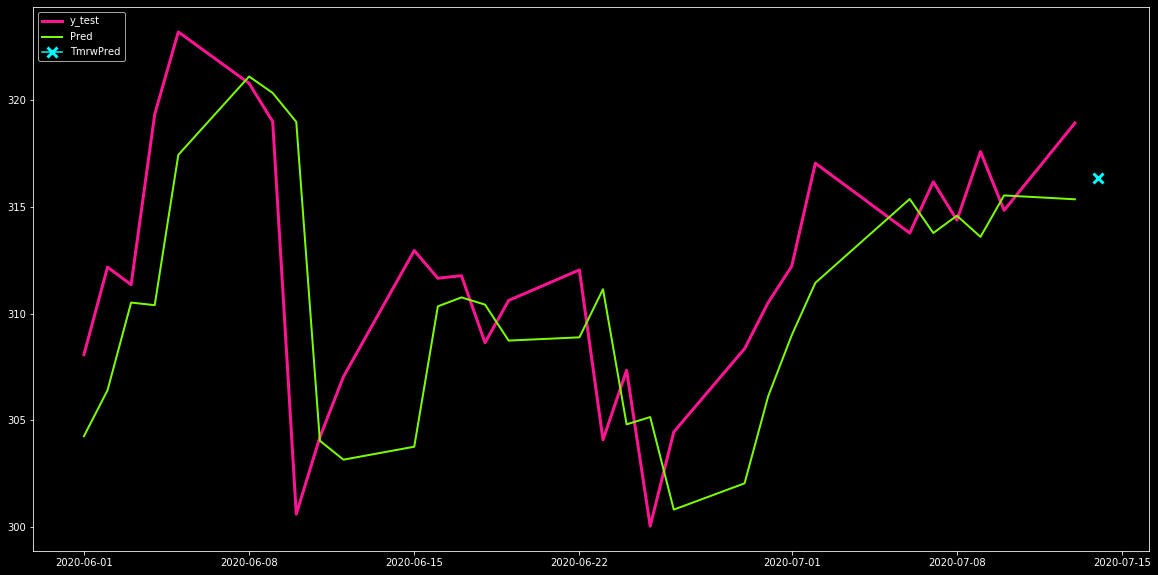

Error in %:  3.930165825845942 18


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

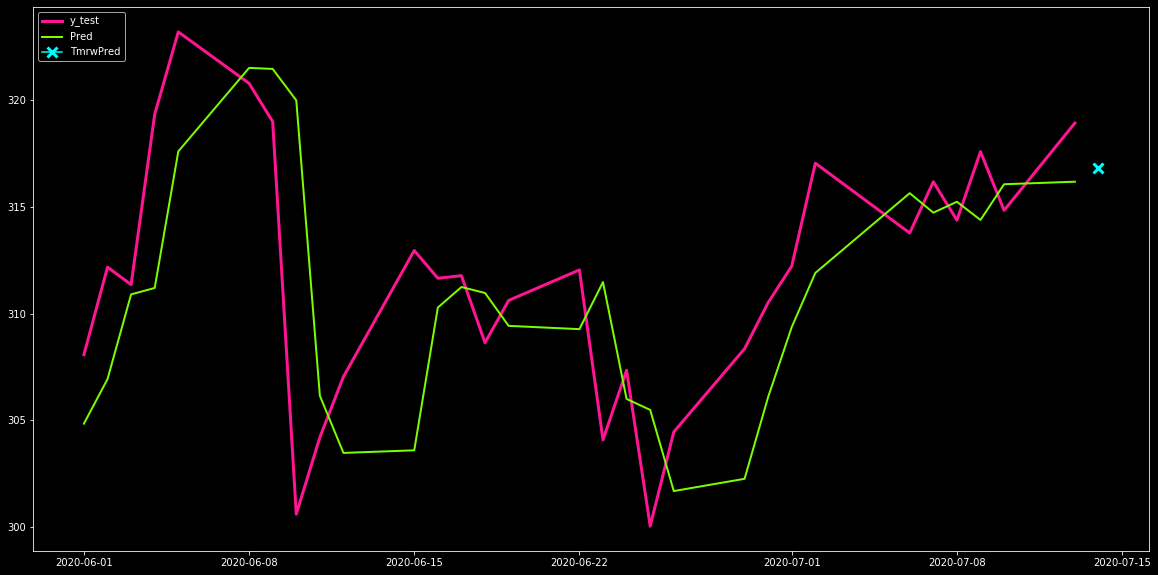

Error in %:  3.8373794067550744 19


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

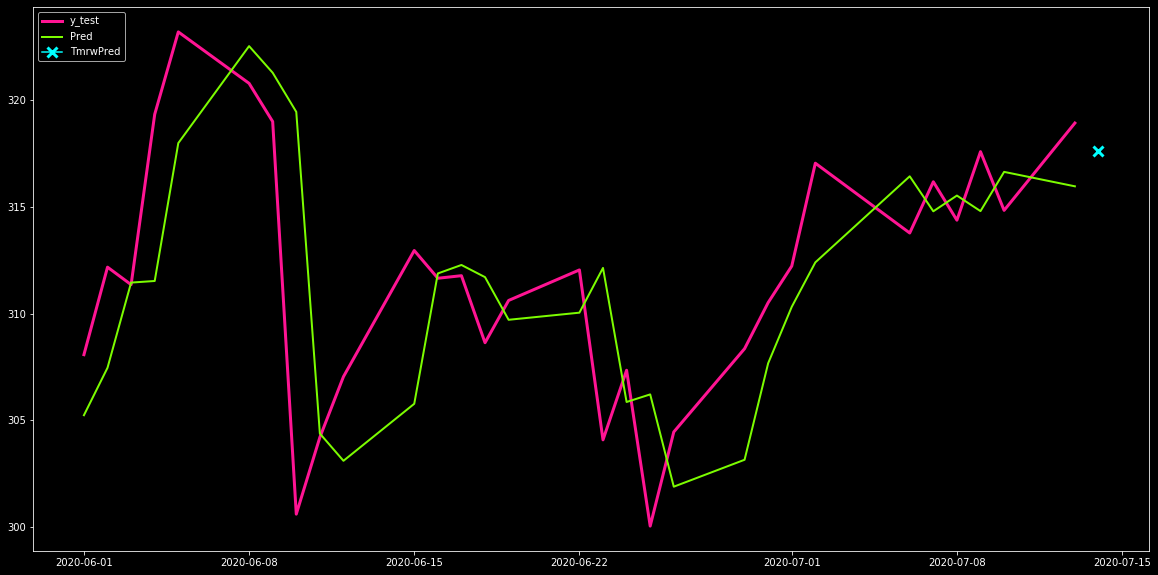

Error in %:  3.5718643275845863 20


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

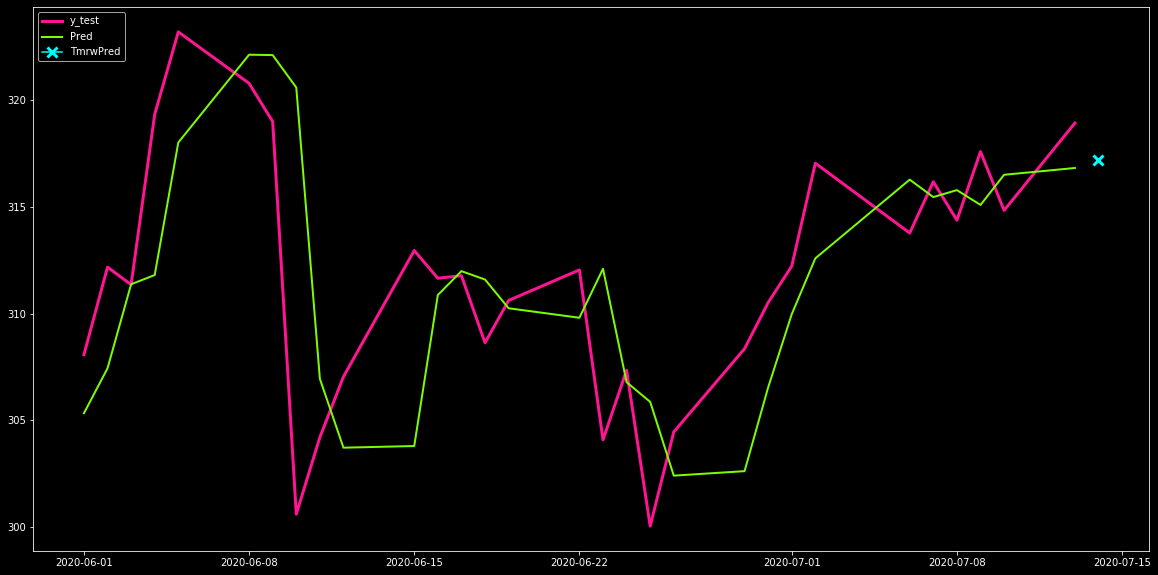

Error in %:  3.6733196148590803 21


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

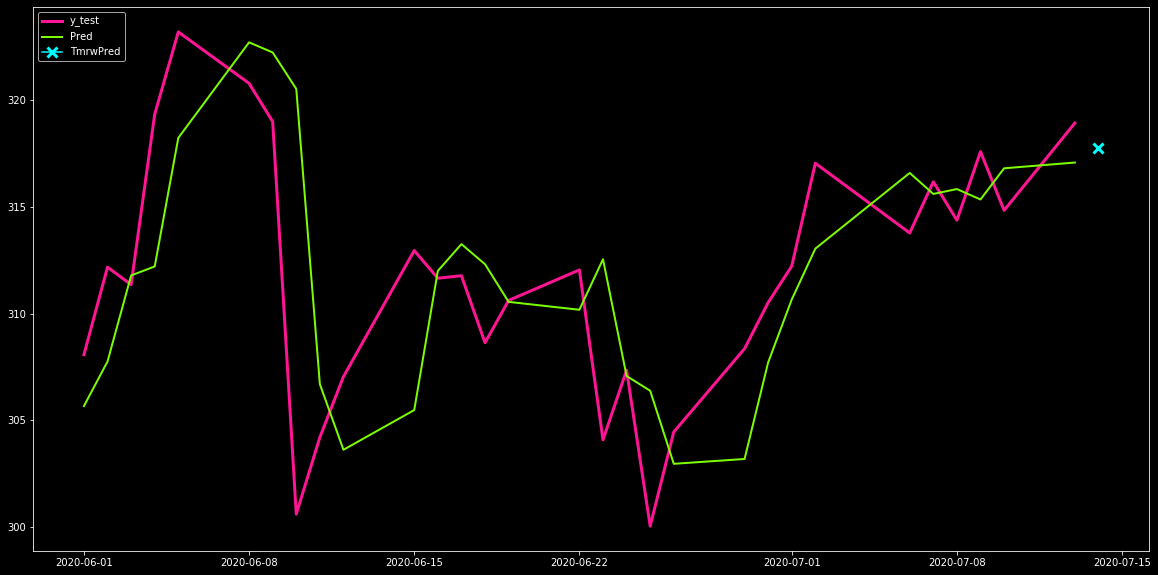

Error in %:  3.5416724811459366 22


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

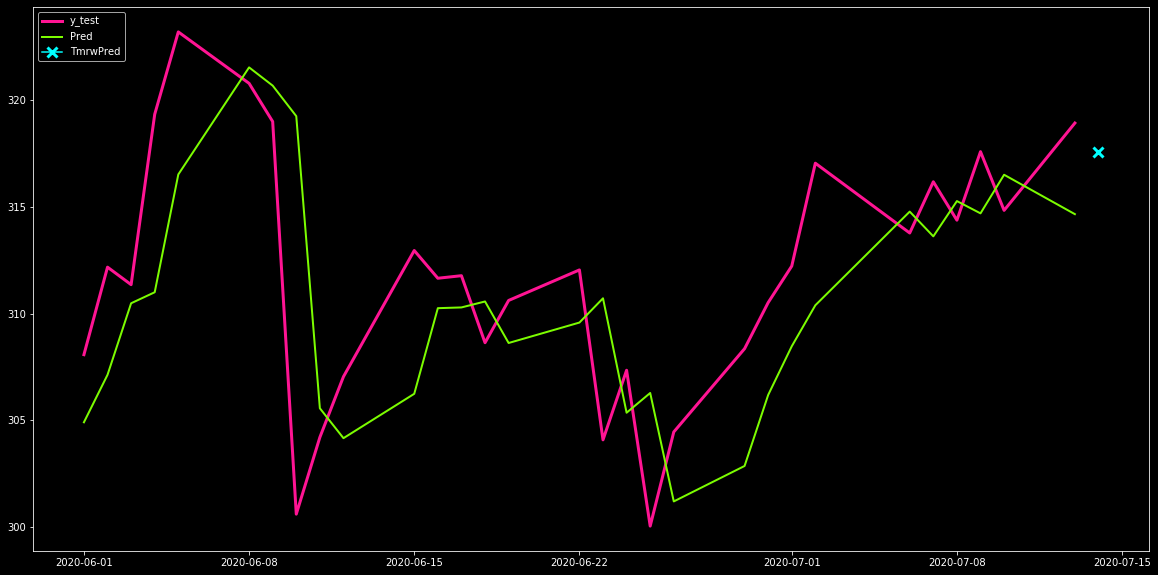

Error in %:  3.9009700772830835 23


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

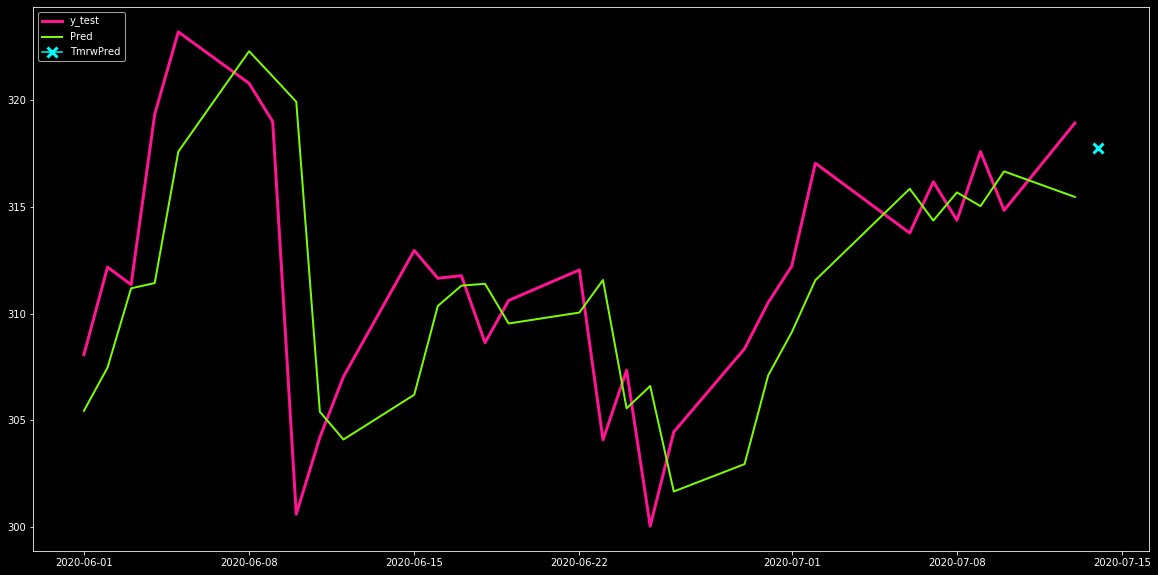

Error in %:  3.717091856839505 24


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

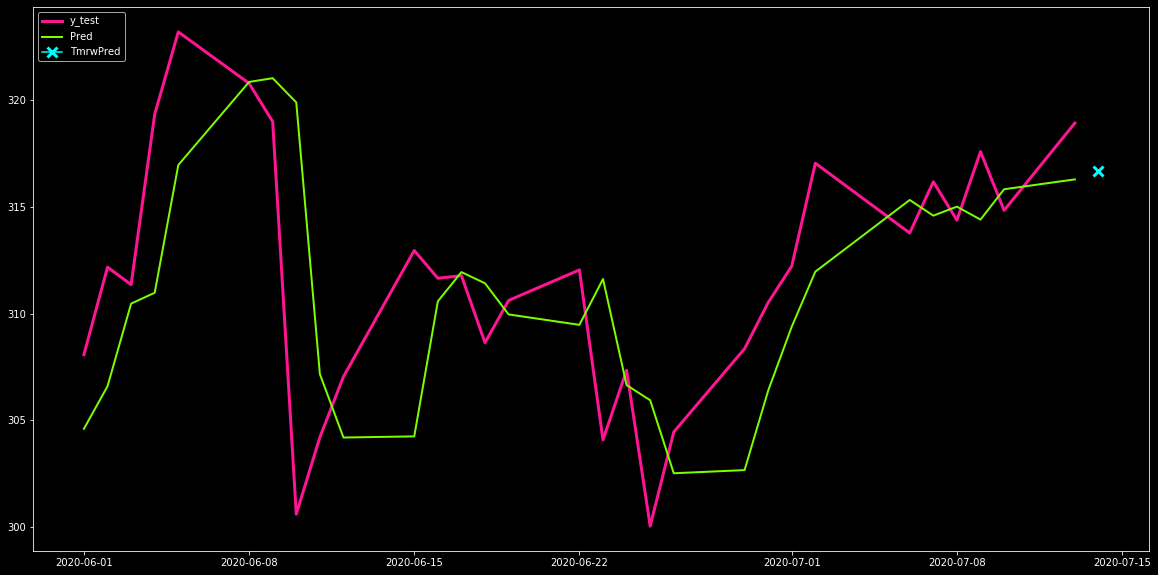

Error in %:  3.7357248939853815 25


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

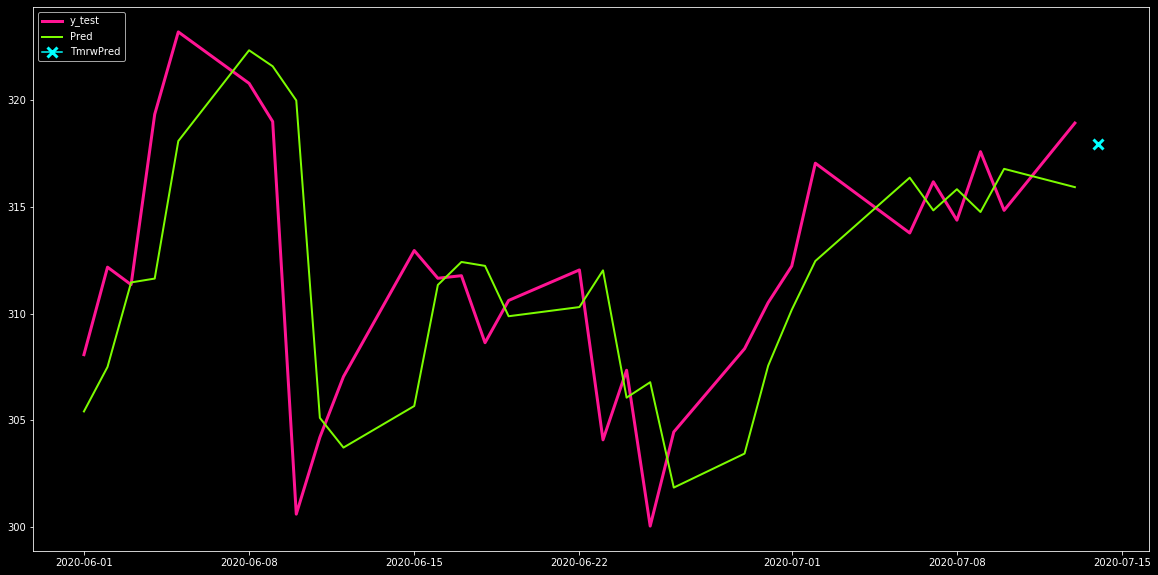

Error in %:  3.6181943331886712 26


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

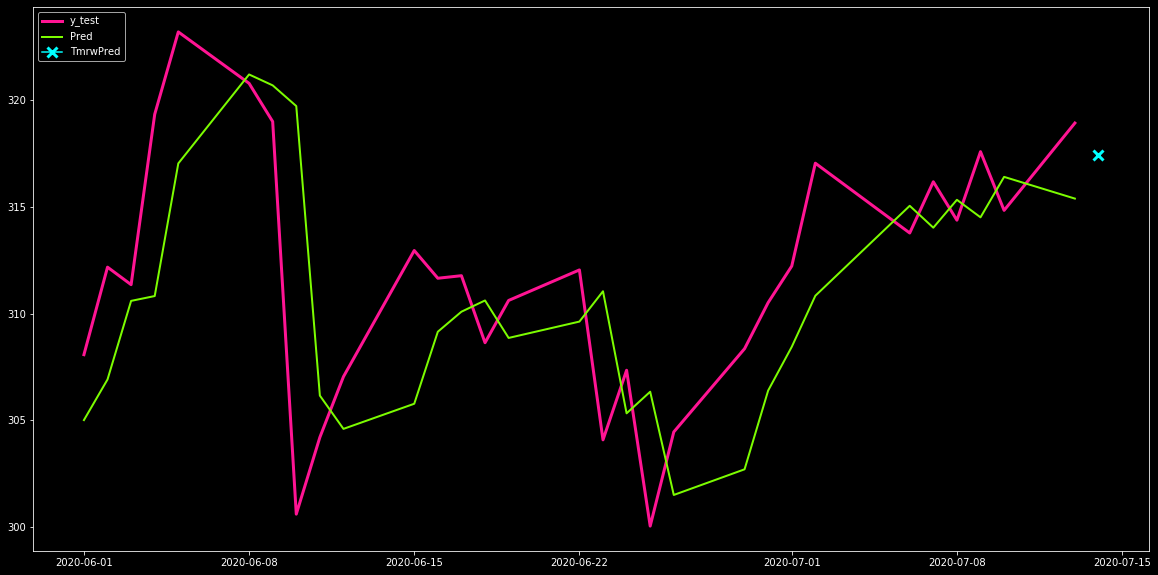

Error in %:  3.915373876225241 27


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

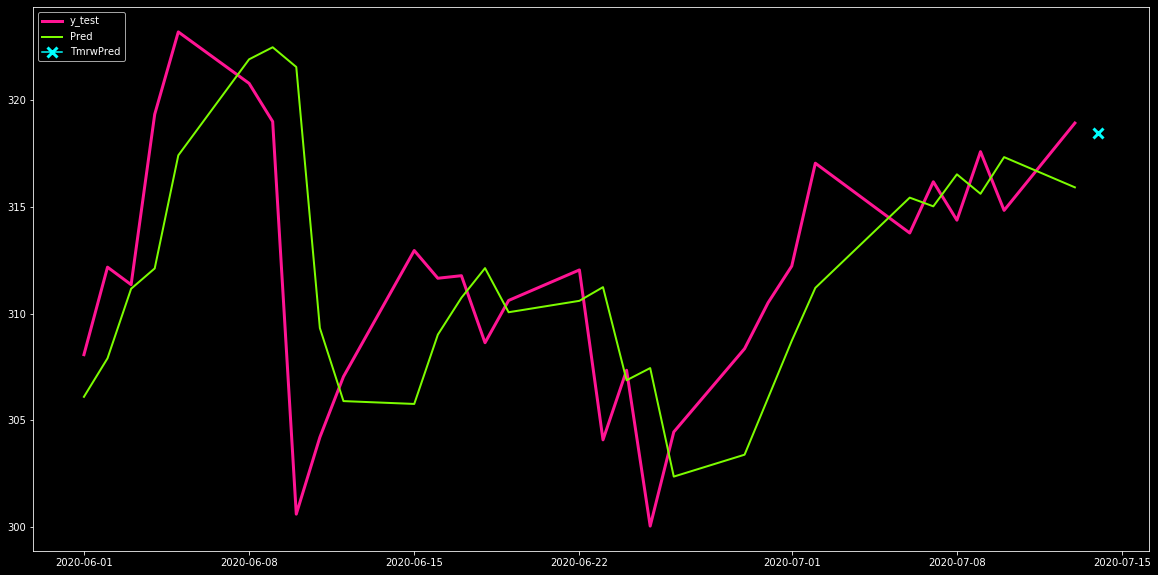

Error in %:  3.864082277856958 28


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

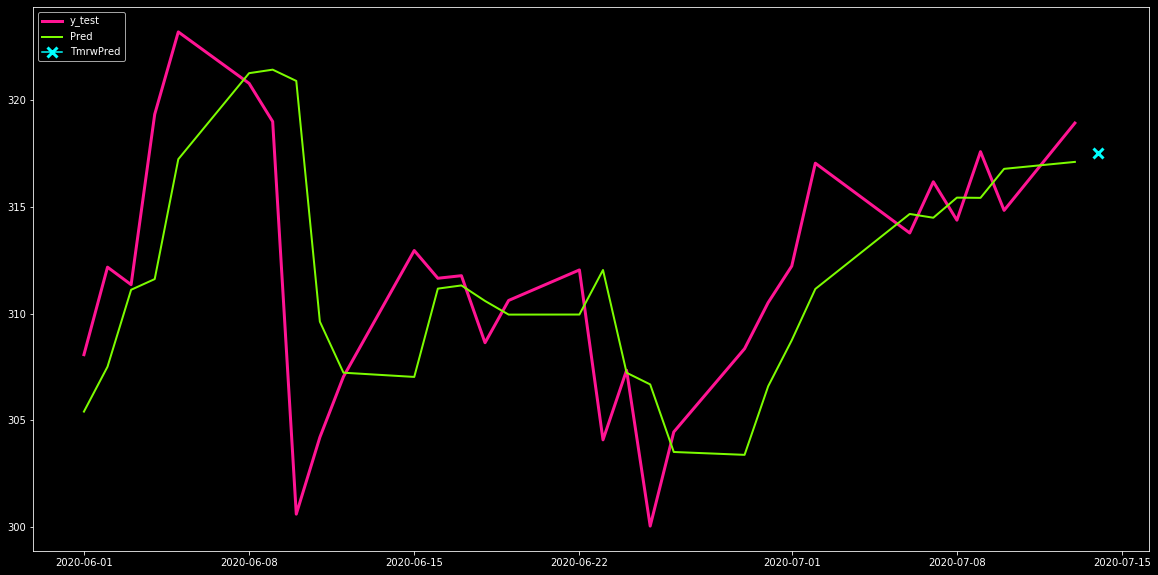

Error in %:  3.5033431977728204 29


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

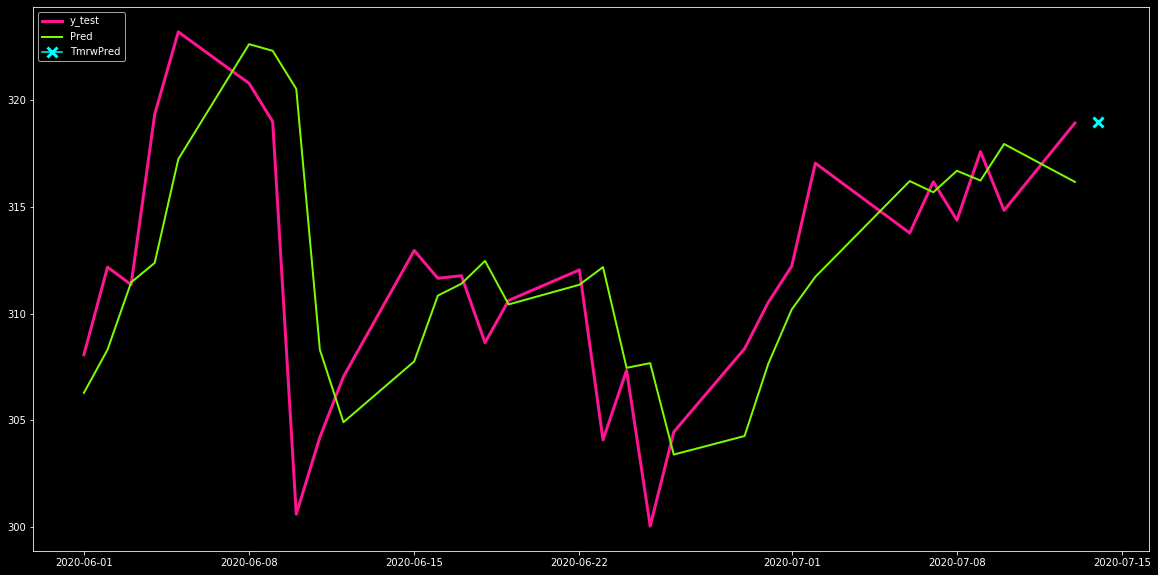

Error in %:  3.492162760274289 30


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

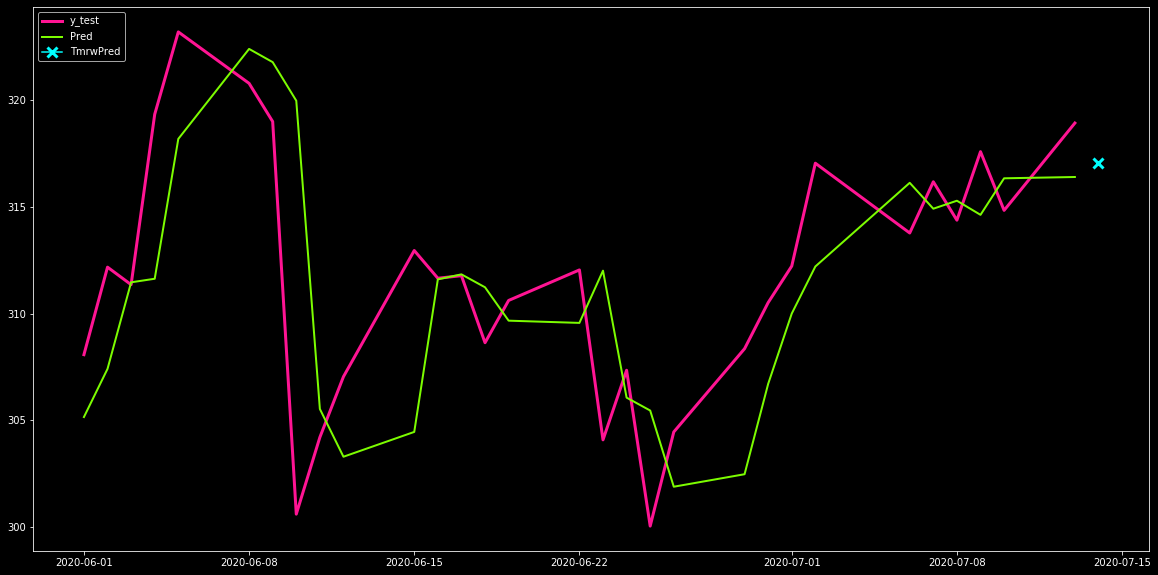

Error in %:  3.6480796893204133 31


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

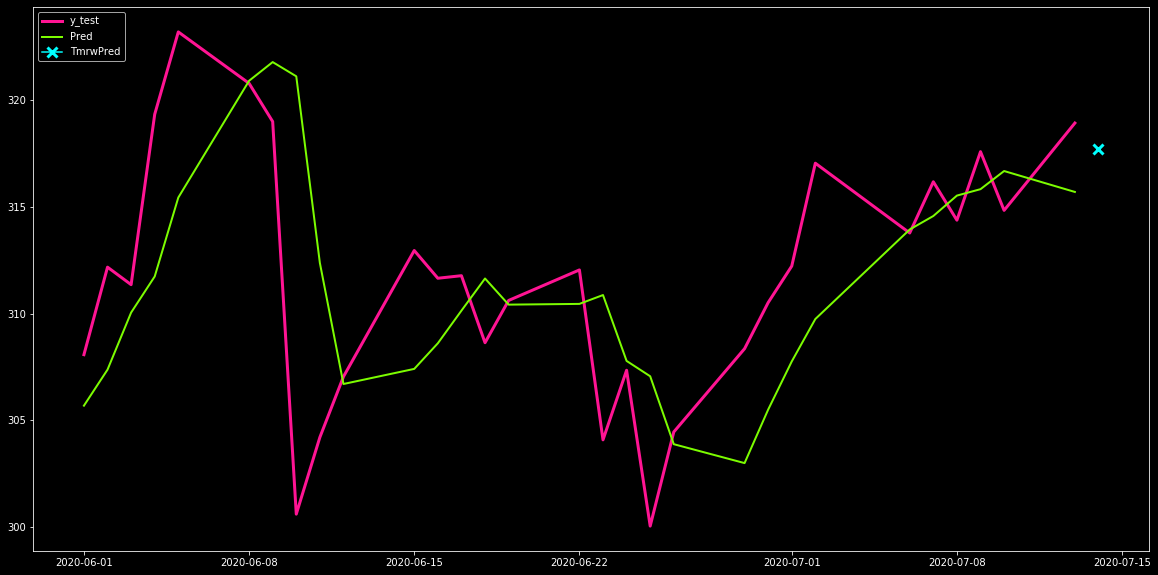

Error in %:  3.9168088781021972 32


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

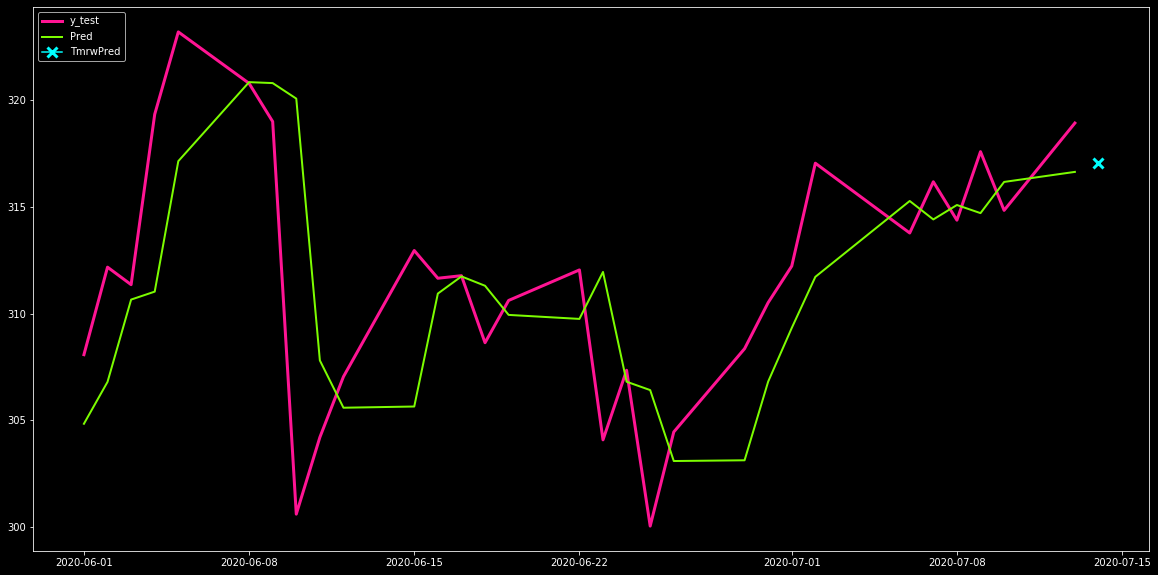

Error in %:  3.5837911464583385 33


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

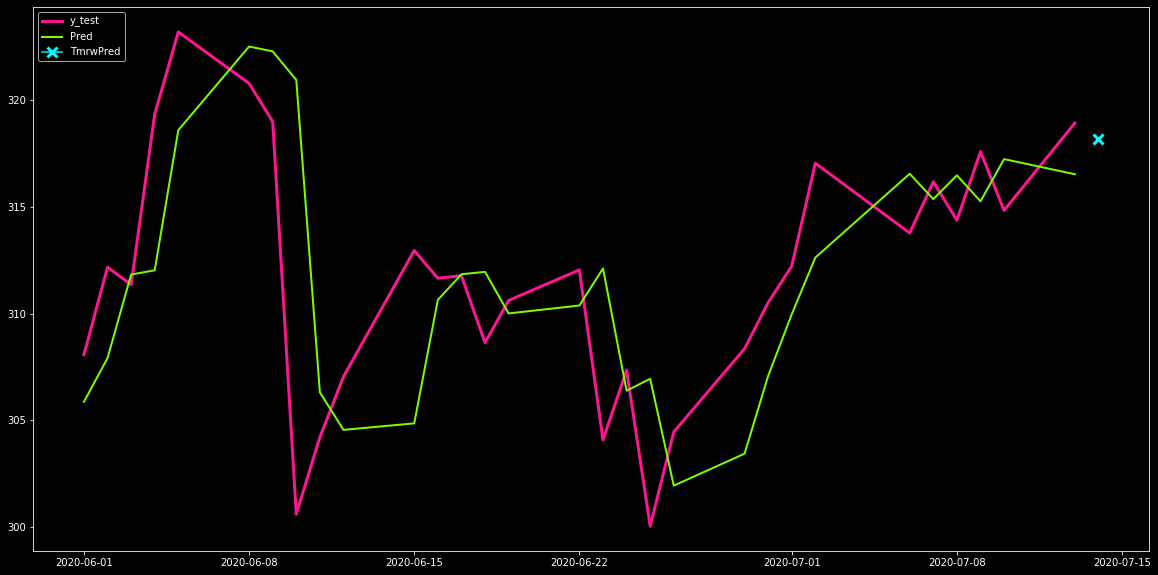

Error in %:  3.660992717853685 34


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

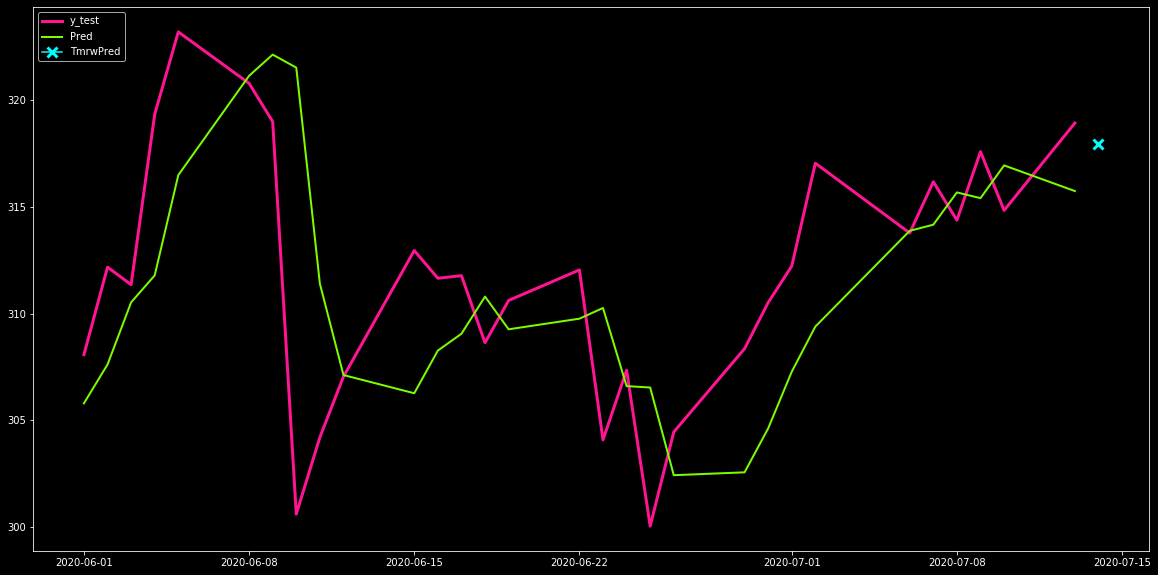

Error in %:  4.093504711310955 35


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

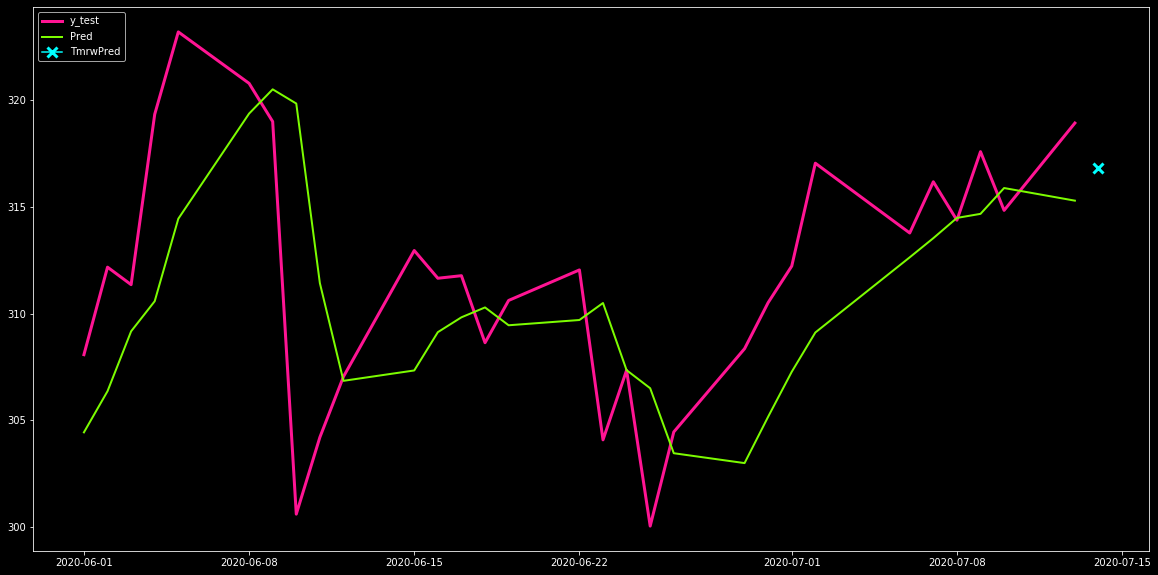

Error in %:  4.097051175686312 36


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

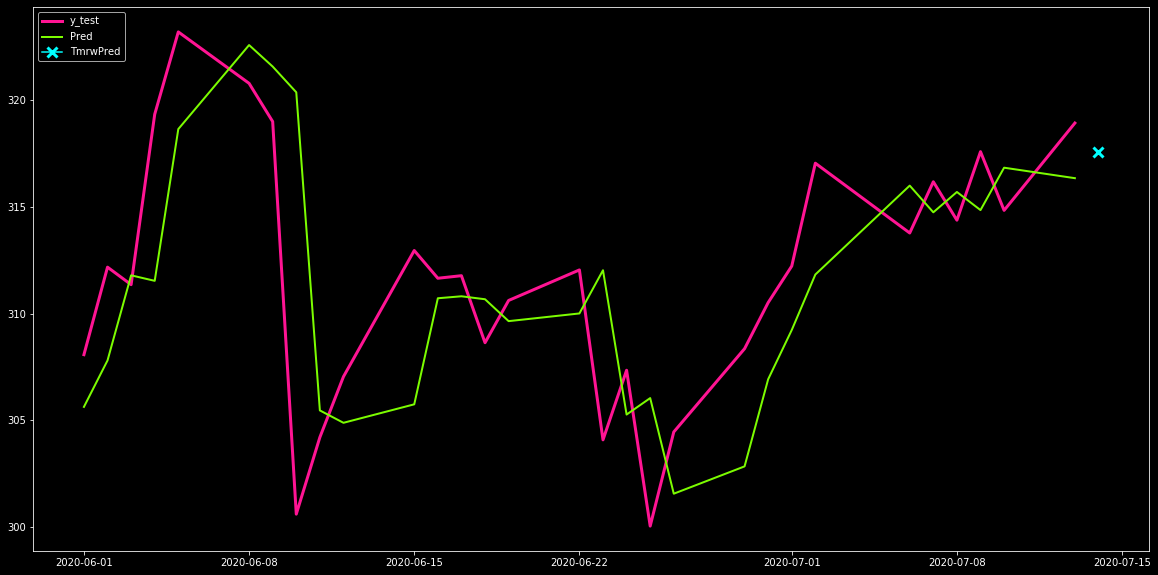

Error in %:  3.660754692273686 37


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

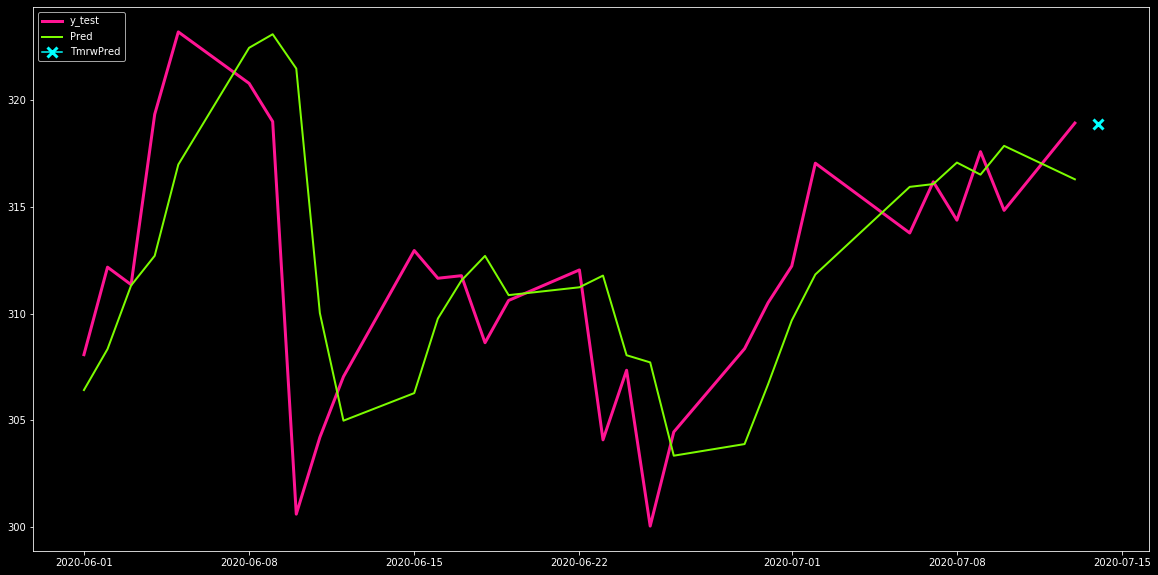

Error in %:  3.7243716300315897 38


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

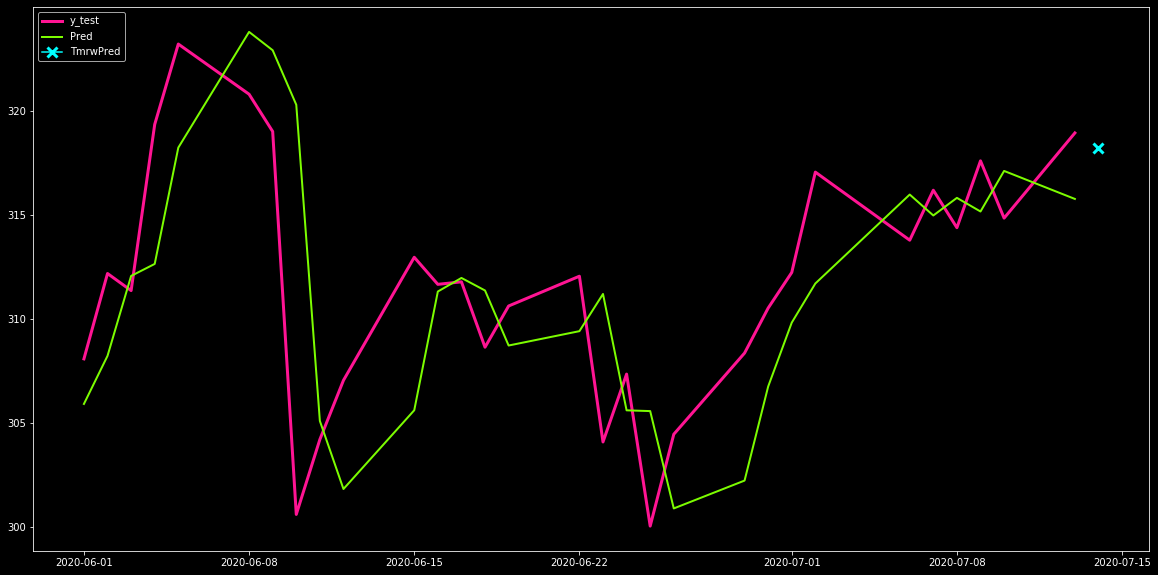

Error in %:  3.820118311126411 39


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

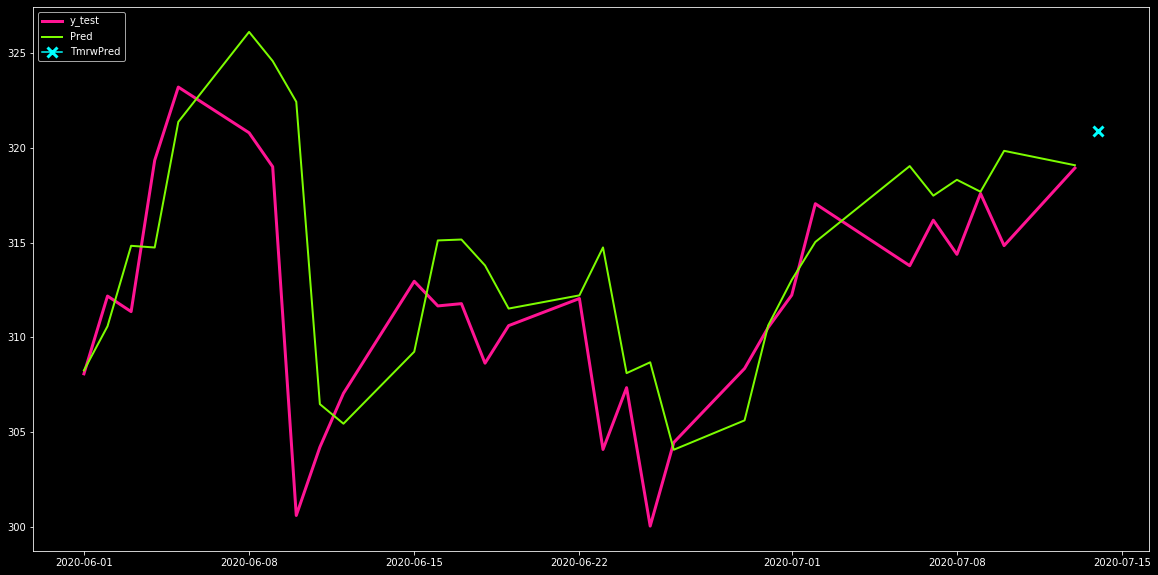

Error in %:  3.561471281564434 40


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

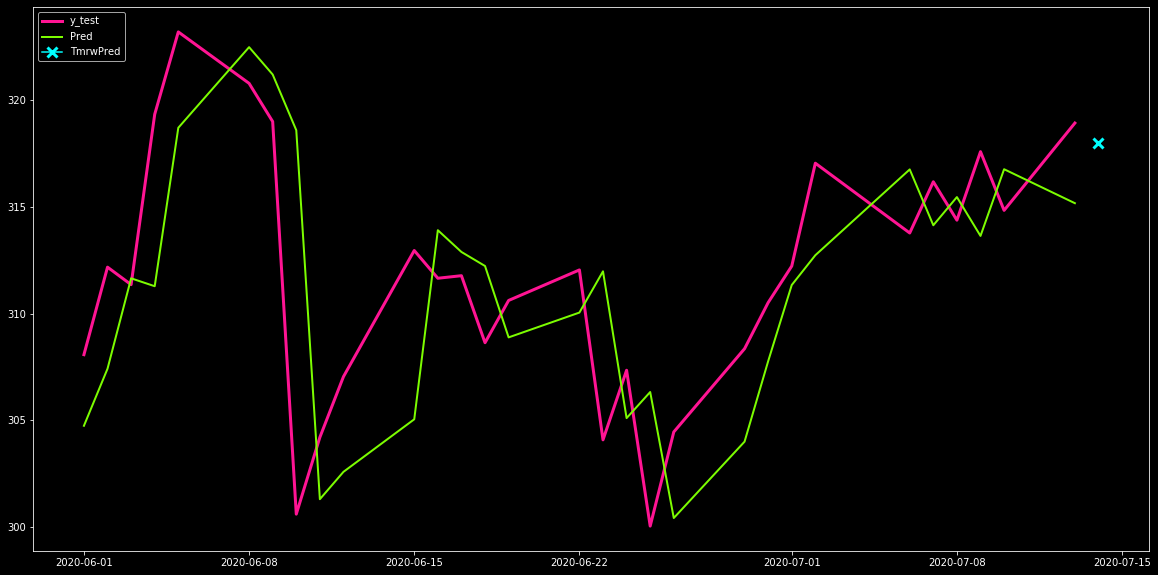

Error in %:  3.9078844725877273 41


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

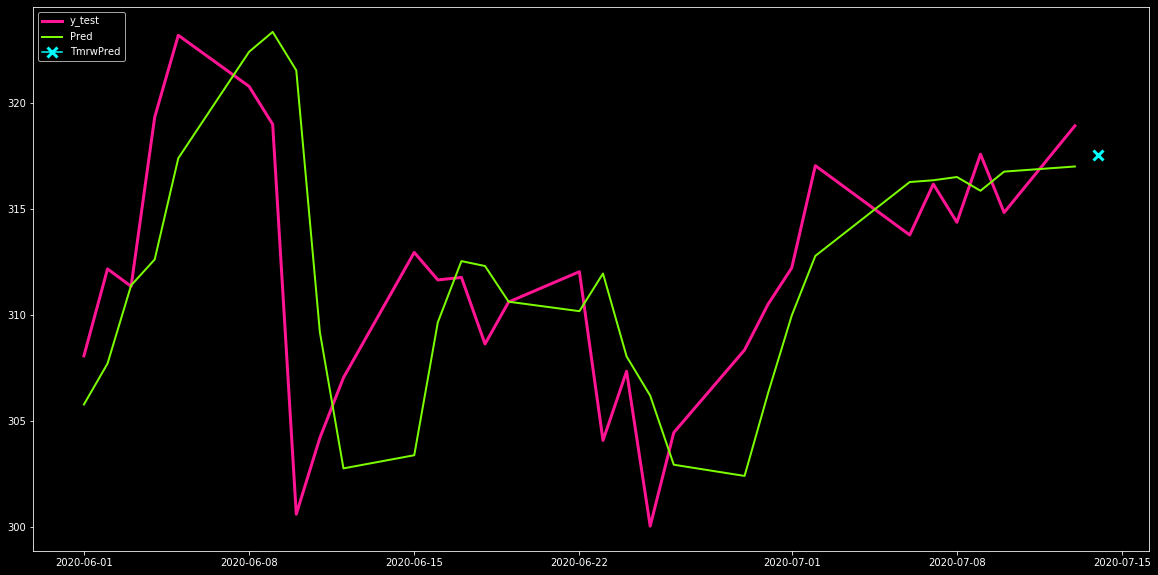

Error in %:  3.888382146236 42


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

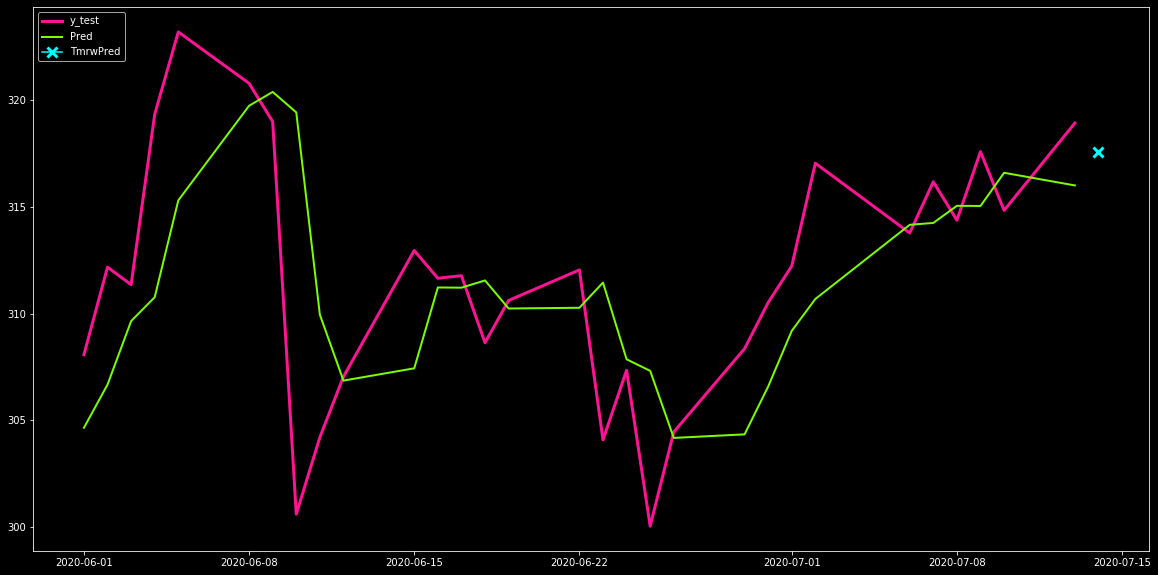

Error in %:  3.6282522614099757 43


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

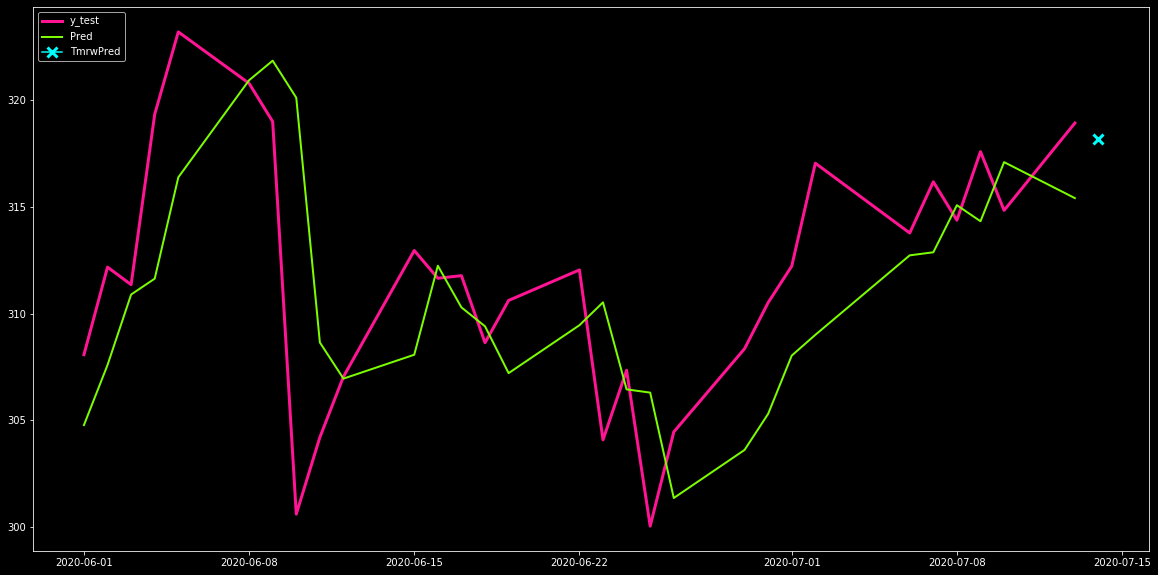

Error in %:  3.8856877269388272 44


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

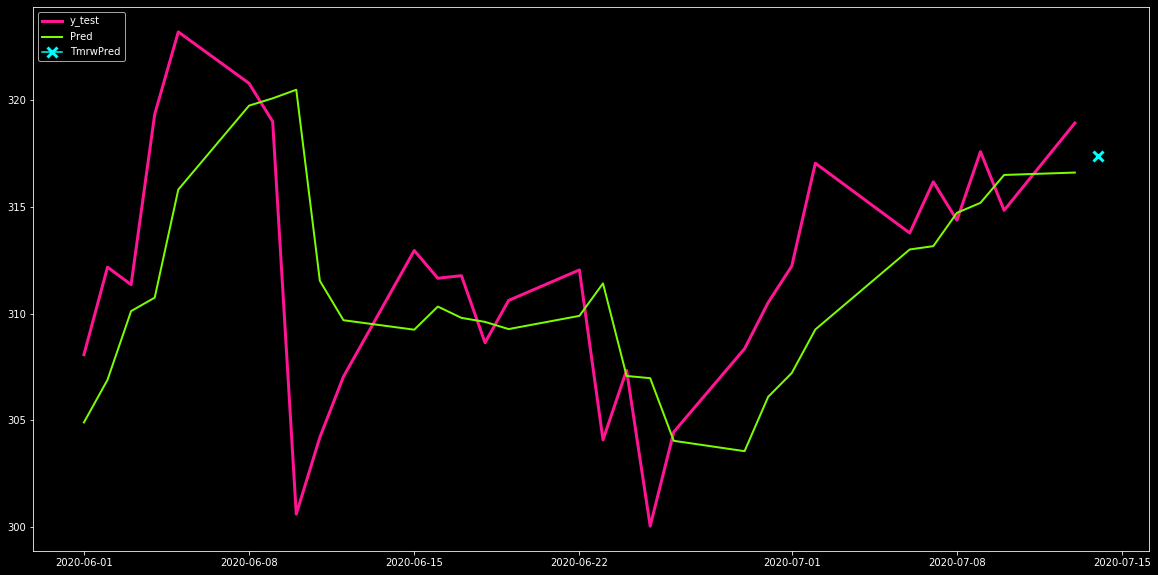

Error in %:  3.8864218825361547 45


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

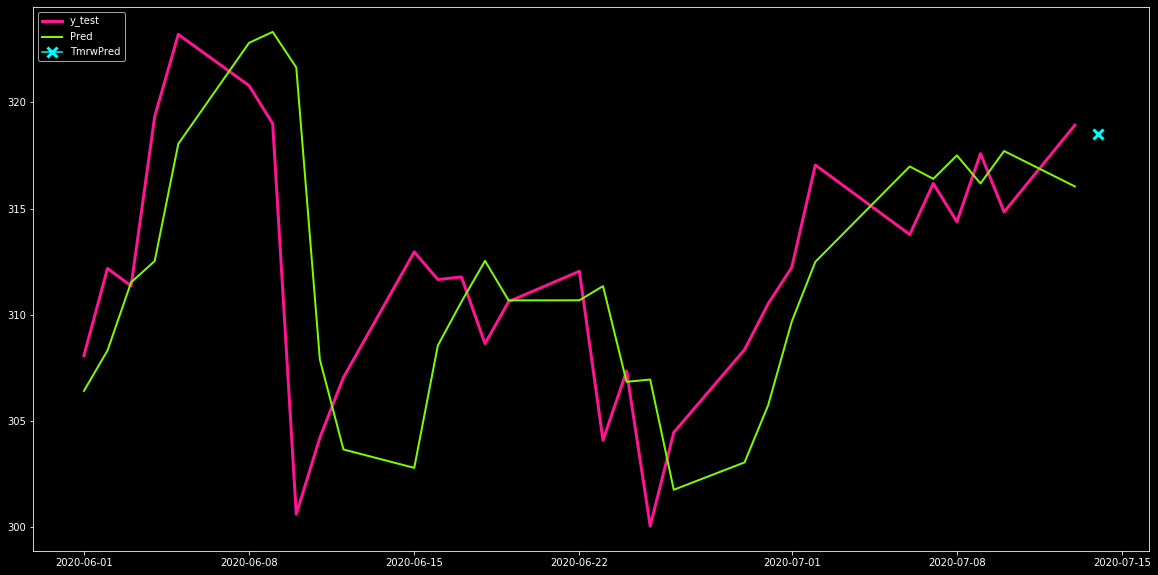

Error in %:  4.004777810432474 46


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

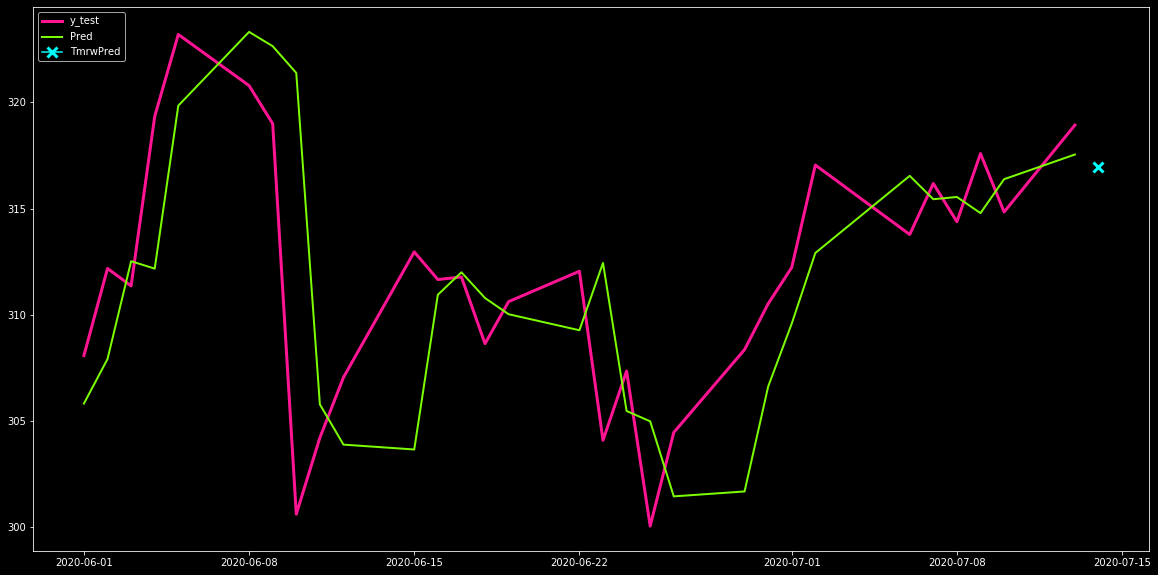

Error in %:  3.7198051395163265 47


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

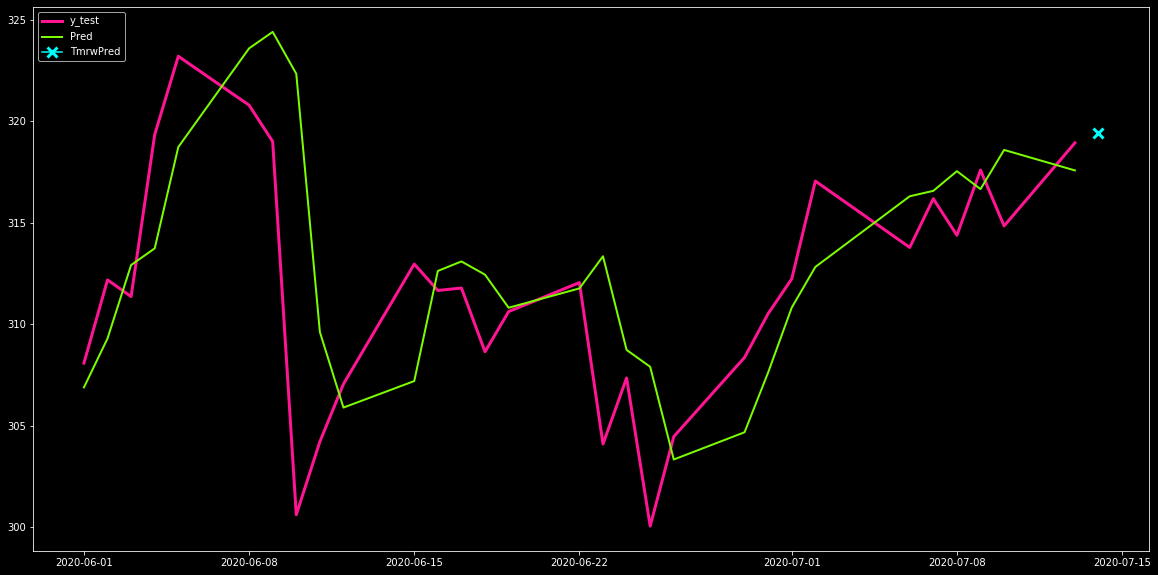

Error in %:  3.615375459031416 48


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

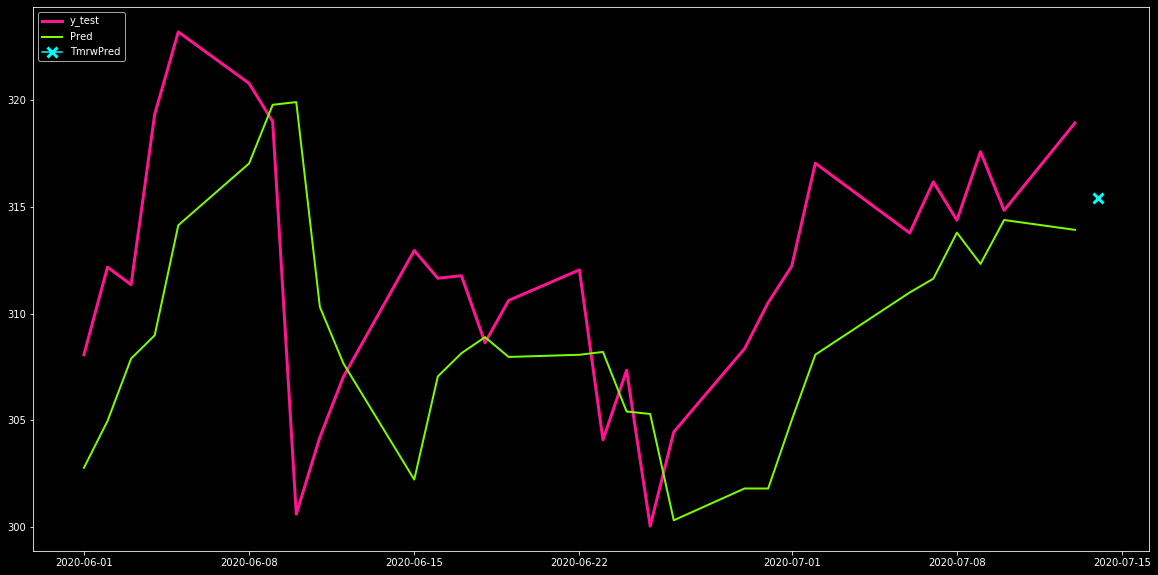

Error in %:  5.242773669773786 49


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

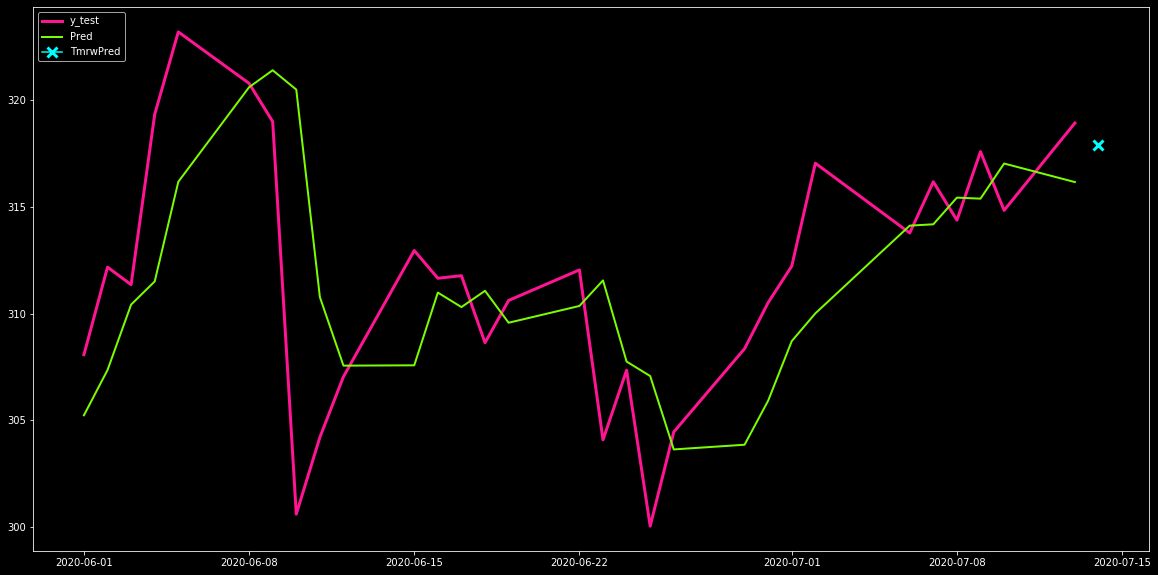

Error in %:  3.7202766122267446 50


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

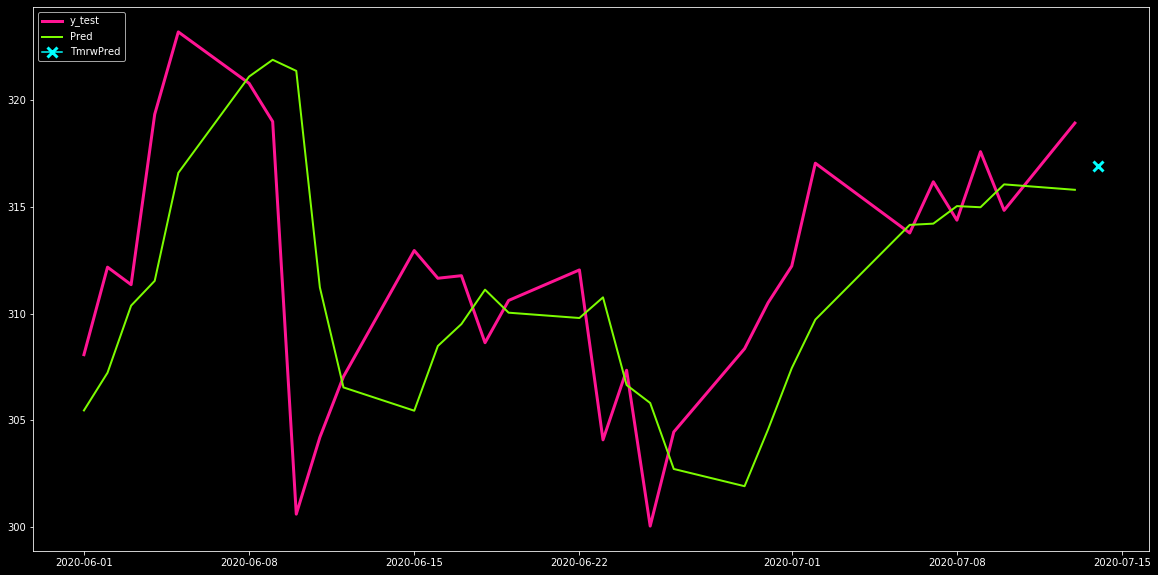

Error in %:  4.06670265947028 51


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

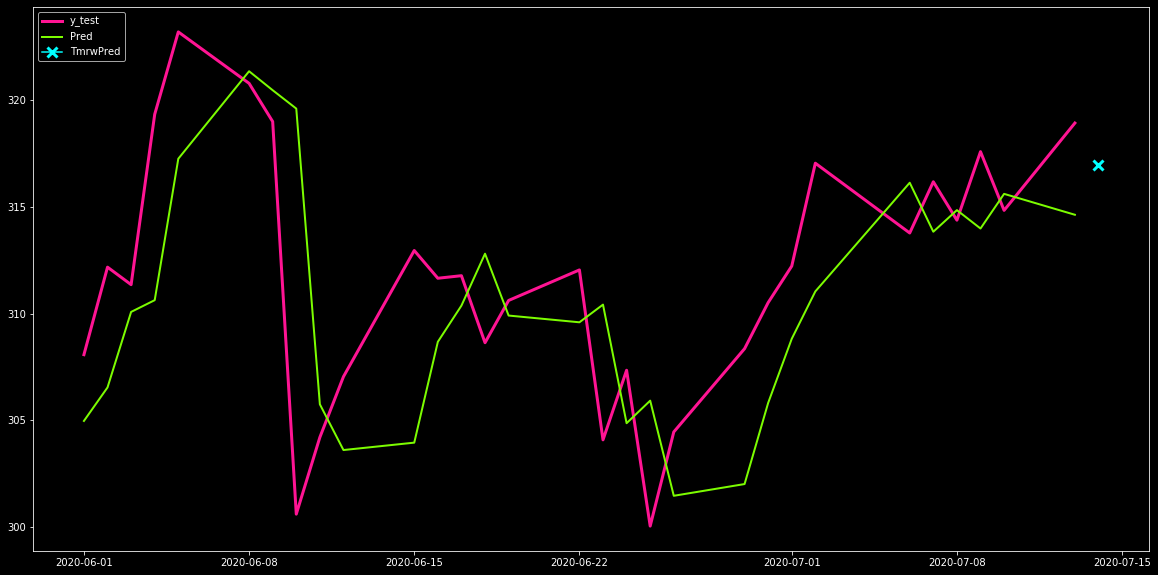

Error in %:  4.11202600973628 52


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

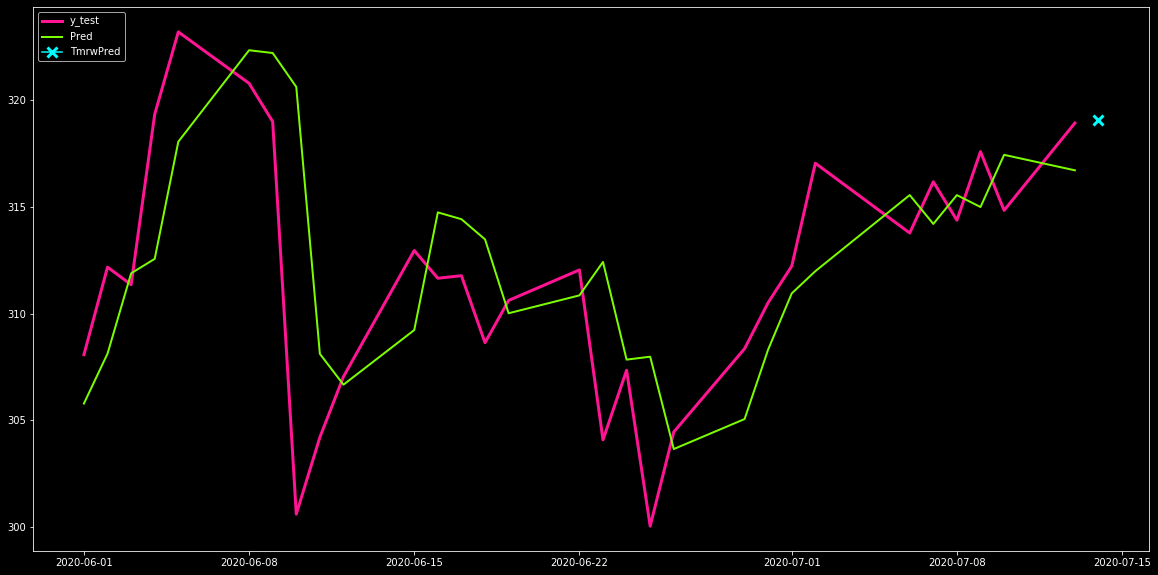

Error in %:  3.522451364975507 53


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

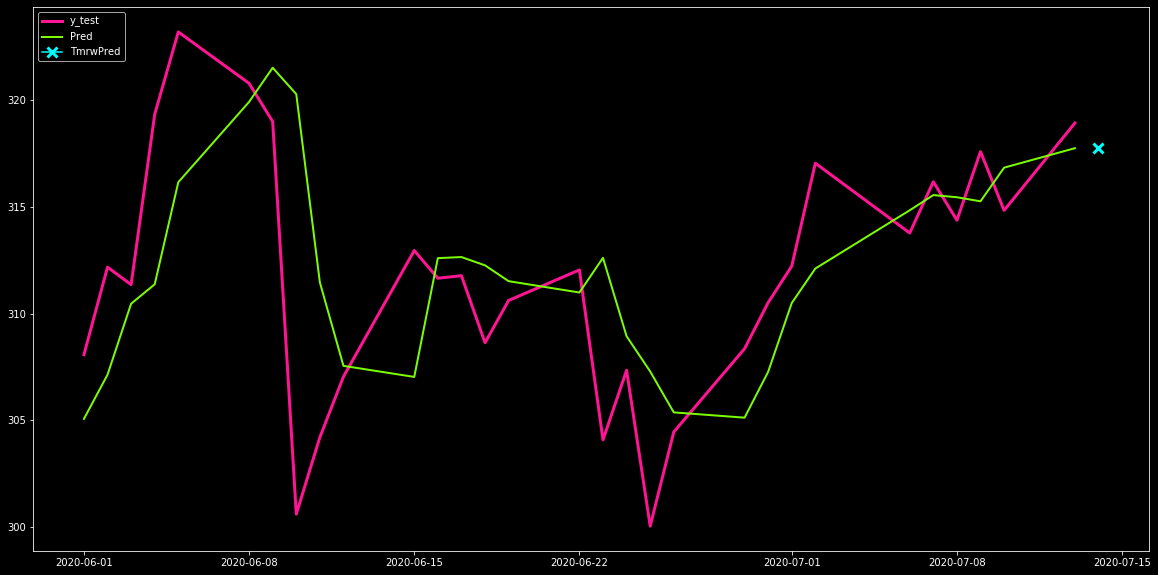

Error in %:  3.5924859590008094 54


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

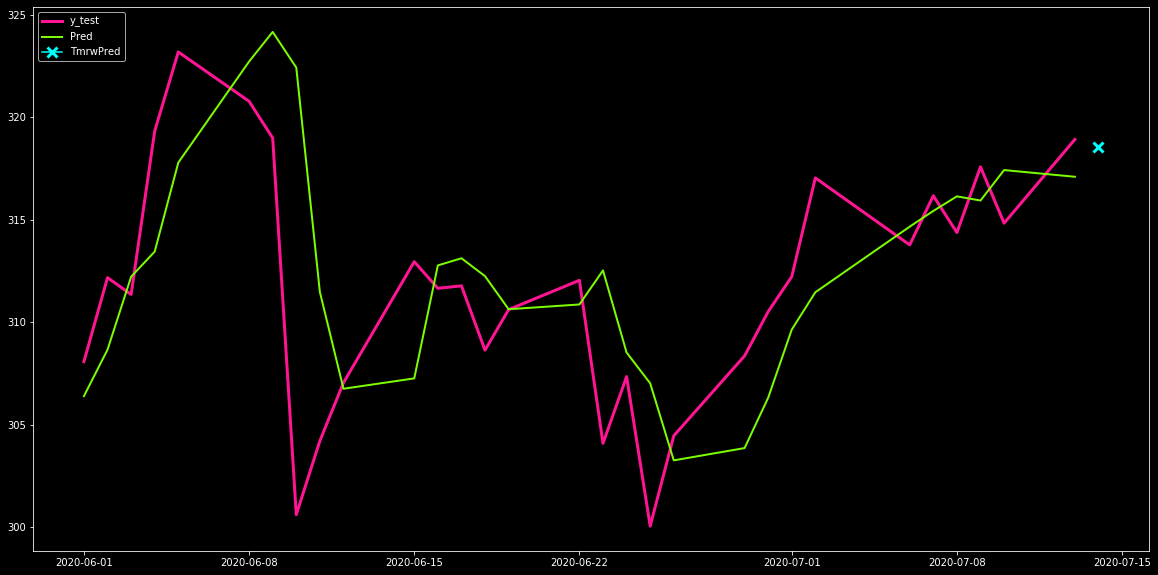

Error in %:  3.6989305757479105 55


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

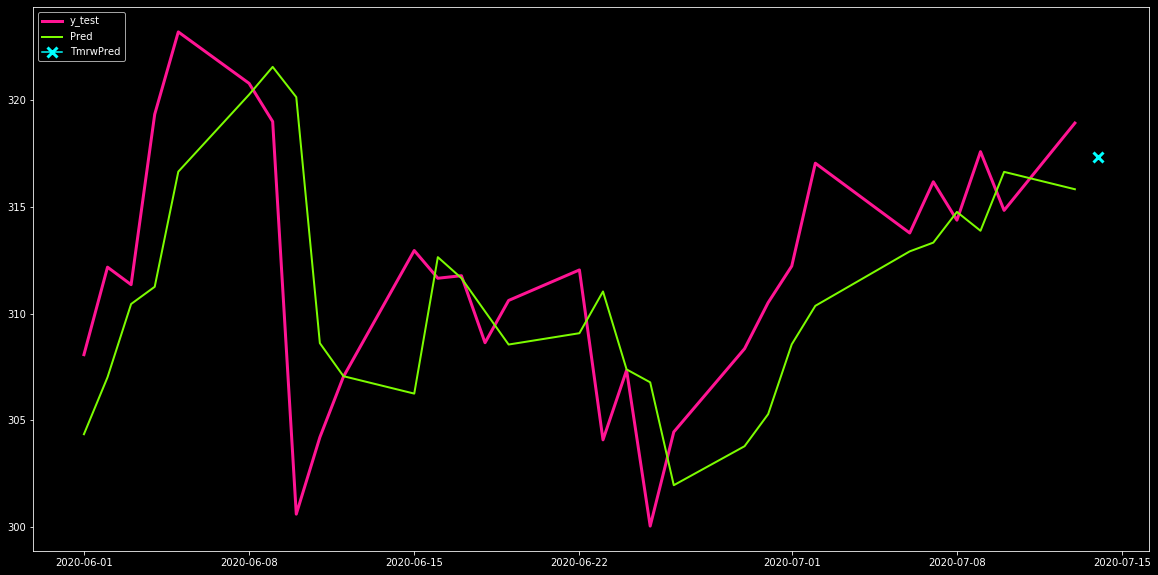

Error in %:  3.8281333190026694 56


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

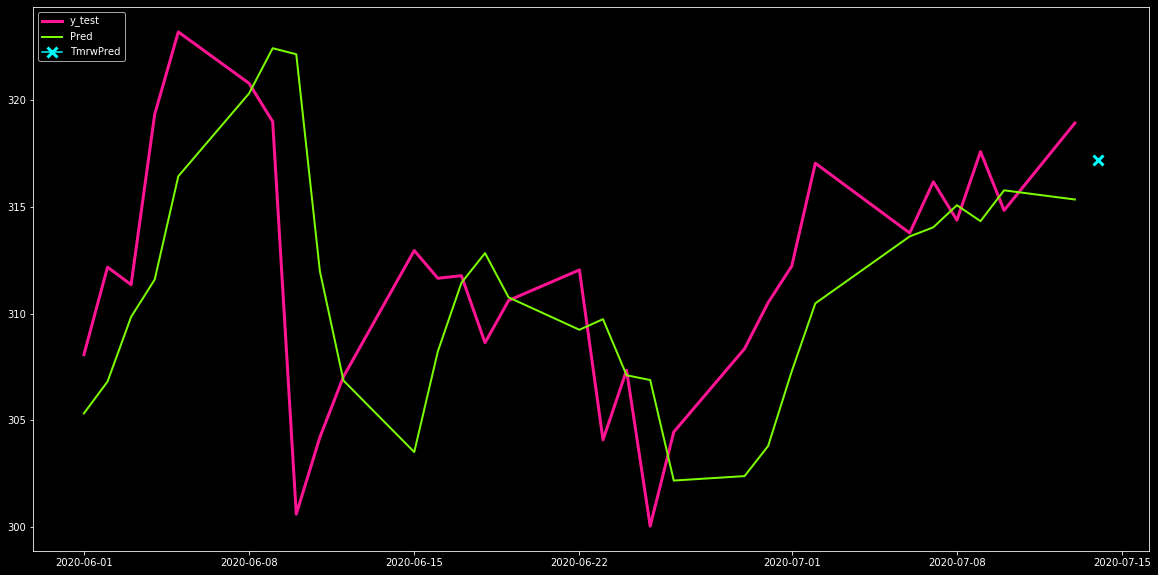

Error in %:  4.2614098431826 57


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

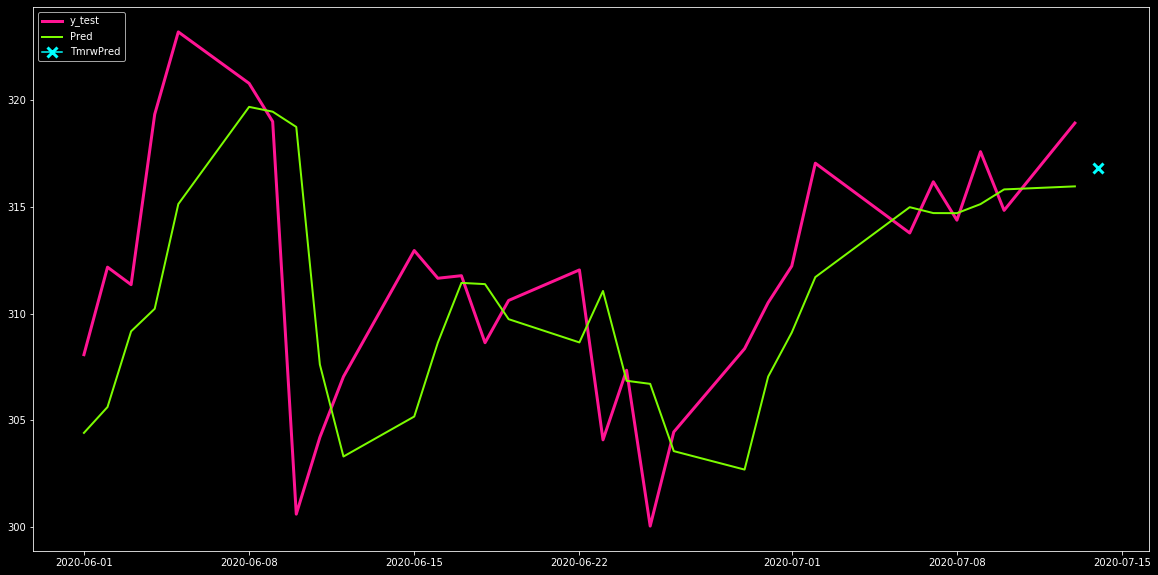

Error in %:  3.88648013233208 58


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

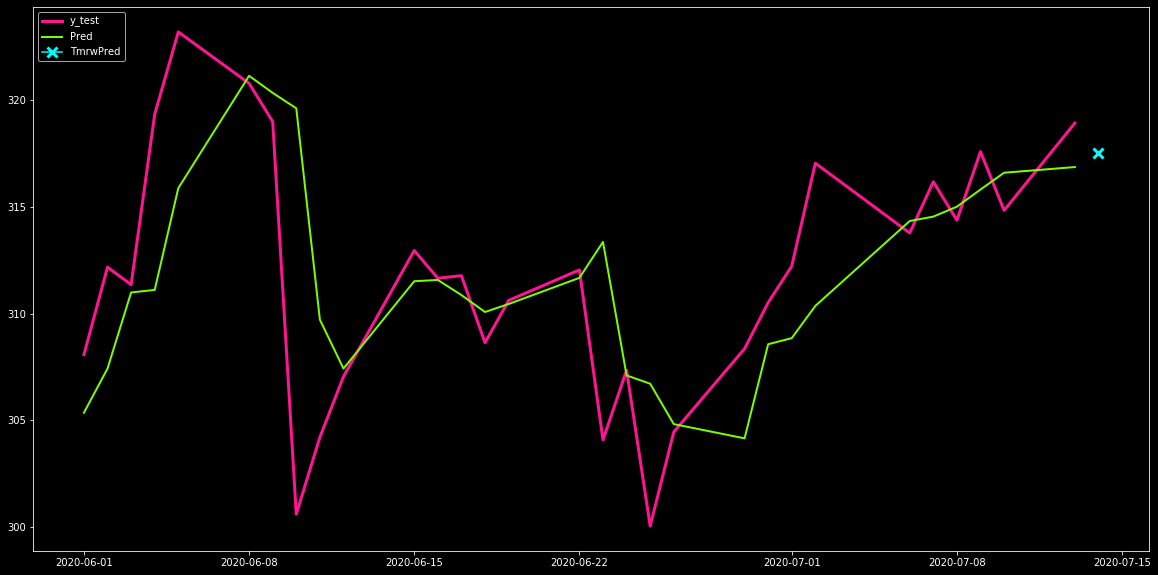

Error in %:  3.1857419646846057 59


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

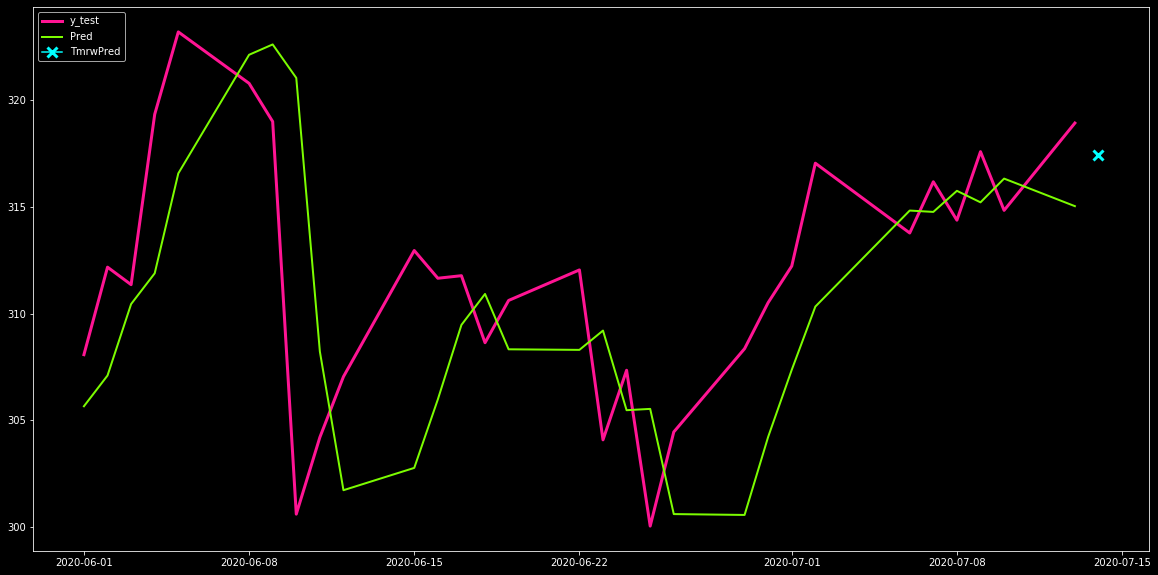

Error in %:  4.575185110165319 60


In [384]:
for i in range(1, 60):
    #Feature Selection with skicit
    selector = SelectKBest(f_regression, k=i+1)
    sf = selector.fit_transform(fdata[lnan:][:-1], data[target][lnan:].shift(-1).dropna())
    fnum = selector.get_support(indices=True)
    #Data Splitting
    #X=fdata[['ROC-2','ROC-3','ROCR-2','ROCR-3','ROCP-2','ROCP-3','MOM-2', 'ROCR100-2', 'Close']]#.dropna()

    #X=fdata[f][lnan:]
    #X=fdata.iloc[:, fnum]
    X=fdata[lnan:].iloc[:, fnum[1:]].astype('float')
    tmrw=X[-1:]
    X=X[:-1].dropna()

    y=data[target][lnan:].shift(-1)

    splitp=int(len(X)*0.75)

    X_train= X[:splitp]
    X_test = X[splitp:]
    y_train= y[:splitp]
    y_test= y[splitp:].dropna()

    #y_train=y_train.astype('int')
    #y_test=y_test.astype('int')

    #X_test, y_test
    model=MLPRegressor()

    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    tpred=model.predict(tmrw)
    pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])
    tpred=pd.DataFrame(data=tpred, index=tmrw.index)
    #Plot Pred

    #Plot Pred

    le=30

    plt.figure(figsize=(20,10))
    plt.plot(y_test[-le:],label="y_test",color="deeppink",lw=3)
    plt.plot(pred['Prediction'][-le:],color="lawngreen", lw=2,label="Pred")
    plt.plot(tpred,marker='x',ms=10,label="TmrwPred", mew=3, color='aqua')
    #plt.plot(data[target][-le:], lw=2,label="RealTarget", color='yellow')
    #plt.axhline(0, linestyle=(1,(9,8)), c='w')
    plt.legend(loc='upper left')
    plt.show()

    #Error
    print("Error in %: ",mae(y_test[-le:], pred['Prediction'][-le:]), i+1)
    #conf=confusion_matrix(y_test, pred, labels=[-1,0,1])
    #confm=pd.DataFrame(data=conf, index=[-1,0,1], columns=[-1,0,1])
    #confm

In [57]:
accuracy_score(pm['Movement'][-30:].astype('int'),ym['Movement'][-30:].astype('int'))

0.4666666666666667

In [59]:
model=RandomForestRegressor()#n_estimators=500, max_leaf_nodes=50, max_depth=50, min_samples_split=50,n_jobs=-1)
model.fit(X_train, y_train)
pred=model.predict(X_test)
tpred=model.predict(tmrw)
pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])
tpred=pd.DataFrame(data=tpred, index=tmrw.index)

mf = pd.DataFrame(model.feature_importances_, columns=X.columns)

ValueError: Shape of passed values is (22, 1), indices imply (22, 22)

In [ ]:
mf.plot.bar(figsize=(15, 10))

In [ ]:




for i in range(2, len(period)):
    fdata['ROC-%i'%period[i]] = talib.ROC(data['Close'], period[i])  
for i in range(2, len(period)):
    fdata['MOM-%i'%period[i]] = talib.MOM(data['Close'], period[i])
for i in range(8, len(period), 6):
    fdata['ATR-%i'%i] = talib.ATR(data['High'], data['Low'], data['Close'], timeperiod=i)
for i in range(8, len(period), 6):
    fdata['TRANGE-%i'%i] = talib.TRANGE(data['High'], data['Low'], data['Close'])
for i in range(2, len(period)):
    fdata['VAR-%i'%i] = talib.VAR(data['Close'], i)
for i in range(2, len(period)):
    fdata['KAMA-%i'%i] = talib.KAMA(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['TEMA-%i'%i] = talib.TEMA(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['TRIMA-%i'%i] = talib.TRIMA(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['ULTOSC-%i'%i] = talib.ULTOSC(data['High'],data['Low'],data['Close'], timeperiod1=i, timeperiod2=i*2, timeperiod3=i*3)
for i in range(2, len(period)):
    fdata['PPO-%i'%i] = talib.PPO(data['Close'], fastperiod=i, slowperiod=i*2, matype=0)
for i in range(2, len(period)):
    fdata['ROCR100-%i'%i] = talib.ROCR100(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['ROCR-%i'%i] = talib.ROCR(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['TRIX-%i'%i] = talib.TRIX(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['ADXR-%i'%i] = talib.ADXR(data['High'],data['Low'],data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['MINUS_DI-%i'%i] = talib.MINUS_DI(data['High'],data['Low'],data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['WILLR-%i'%i] = talib.WILLR(data['High'],data['Low'],data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['ROCP-%i'%i] = talib.ROCP(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['DX-%i'%i] = talib.DX(data['High'],data['Low'],data['Close'], timeperiod=i)
for i in range(len(period)*2,len(period)*5 ):
    fdata['VAR-%i'%i] = talib.VAR(data['Close'], timeperiod=i, nbdev=5)
for i in range(2, len(period)):
    fdata['CMO-%i'%i] = talib.CMO(data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['ADX-%i'%i] = talib.ADX(data['High'],data['Low'],data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['NATR-%i'%i] = talib.NATR(data['High'],data['Low'],data['Close'], timeperiod=i)
for i in range(2, len(period)):
    fdata['TSF-%i'%i] = talib.TSF(data['Close'], timeperiod=i)
    

In [167]:
#Corr Analysis



corrt=0.01

corrd=fdata[lnan:]
corco=pd.DataFrame(data=corrd).reset_index(drop=True)
corco.insert(0,target,data[target].shift(-1)[lnan:].values)
plt.figure(figsize=(29,10))
corr=corco.corr().iloc[:1, 1:]
sns.heatmap(corr)
f=[]

for col in corr.columns:
    if corr[col].loc[target]>corrt:
        if col!='Adj Close' and col!=target and col!='DReturn'and col!='High' and col!='Close'and col!='Low'and col!='Pct Change':
            print(corr[col][target], col)
            f.append(col)
#hf=hf[:]
print("Features: ", len(f))

ValueError: cannot insert Pct Change, already exists

In [11]:
max=60
fscore=pd.DataFrame(index=np.arange(1, max, 1))
fscore['Feature']=None
fscore['Deviation']=None
fscore['Error MAE']=None
fscore['Error R2']=None
fscore['Accuracy']=None


In [93]:
for featurenum in np.arange(1, max-1, 1):
    print(f"---FEATURES: {featurenum}---")
    #Feature Selection with scikit regr SPY
    selector = SelectKBest(f_regression, featurenum)
    sf = selector.fit_transform(fdata[lnan:][:-1], data[lnan:][target].shift(-1).dropna())
    fnum = selector.get_support(indices=True) 
    
    
    #Data Splitting
    #X=fdata[f][lnan:]
    #X=fdata[mf][lnan:]
    #X=fdata[lnan:]
    #X=fdata[['ROC-2','ROC-3','ROCR-2','ROCR-3','ROCP-2','ROCP-3','MOM-2', 'ROCR100-2']]#.dropna()
    X=fdata[lnan:].iloc[:, fnum[:]].astype('float')
    #X=fdata[lnan:][['MOM 10', 'MACD HIST4', 'CORREL 3', 'PPO 6', 'MACDEXT HIST5','MACD HIST6', 'MOM 17', 'MOM 13', 'MACDEXT HIST6', 'MACDEXT HIST4']]


    tmrw=X[-1:]
    X=X[:-1]

    y=data[target][lnan:].shift(-1).dropna().astype('float')

    splitp=int(len(X)*0.75)

    X_train= X[:splitp]
    X_test = X[splitp:]
    y_train= y[:splitp]
    y_test= y[splitp:]

    #y_train=y_train.astype('int')
    #y_test=y_test.astype('int')
    print(len(X_test.columns))
    X_test.columns
    
    
    model=MLPRegressor()
    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    tpred=model.predict(tmrw)
    pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])
    tpred=pd.DataFrame(data=tpred, index=tmrw.index)
    
    #Close
    ym=pd.DataFrame(index=y_test.index)
    ym['Movement']=None
    for i in range(len(y_test)-1):
        if y_test.iloc[i]<y_test.iloc[i+1]:
            ym['Movement'].iloc[i]=1
        elif y_test.iloc[i]>y_test.iloc[i+1]:
            ym['Movement'].iloc[i]=-1
        else:
            ym['Movement'].iloc[i]=0

    pm=pd.DataFrame(index=pred.index)
    pm['Movement']=None
    for i in range(len(pred['Prediction'])-1):
        if pred['Prediction'].iloc[i]<y_test.iloc[i+1]:
            pm['Movement'].iloc[i]=1
        elif pred['Prediction'].iloc[i]>y_test.iloc[i+1]:
            pm['Movement'].iloc[i]=-1
        else:
            pm['Movement'].iloc[i]=0
    
    
    accs = {}
    for i in np.arange(0,(len(pm))-10,10):
        score=accuracy_score(pm['Movement'][i:i+10].astype('int'), ym['Movement'][i:i+10].astype('int'))
        accs.update({f"{i}-{i+10}":score})

    #plt.figure(figsize=(20,10))
    #plt.bar(range(len(accs)), list(accs.values()), align='center', color='deeppink')
    #plt.xticks(range(len(accs)), list(accs.keys()))
    #plt.xticks(rotation=90)
    #plt.xticks(np.arange(0, len(accs), 1))
    #plt.show()
    
    fscore['Feature'].iloc[featurenum]=featurenum
    fscore['Deviation'].iloc[featurenum]=np.std(list(accs.values()))
    fscore['Error MAE'].iloc[featurenum]=mae(y_test, pred['Prediction'])
    fscore['Error R2'].iloc[featurenum]=r2_score(y_test, pred['Prediction'])
    fscore['Accuracy'].iloc[featurenum]=accuracy_score(pm[:-1].astype('int'), ym[:-1].astype('int'))
    
    #print("Deviation:",np.std(list(accs.values())))
    #print("Error mae: ",mae(y_test, pred['Prediction']))
    #print("Error r2_score: ",r2_score(y_test, pred['Prediction']))
    print("Accuracy Score:",accuracy_score(pm[:-1].astype('int'), ym[:-1].astype('int'))*100)

---FEATURES: 1---
1


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.62470308788599
---FEATURES: 2---
2


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.26840855106889
---FEATURES: 3---
3


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.5059382422803
---FEATURES: 4---
4


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.74346793349169
---FEATURES: 5---
5


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.56532066508314
---FEATURES: 6---
6


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.56532066508314
---FEATURES: 7---
7


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.56532066508314
---FEATURES: 8---
8


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.9809976247031
---FEATURES: 9---
9


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.8622327790974
---FEATURES: 10---
10


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.5059382422803
---FEATURES: 11---
11


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.68408551068883
---FEATURES: 12---


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

12
Accuracy Score: 72.5059382422803
---FEATURES: 13---


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

13
Accuracy Score: 72.80285035629454
---FEATURES: 14---
14


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.62470308788599
---FEATURES: 15---
15


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.03087885985748
---FEATURES: 16---
16


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.62470308788599
---FEATURES: 17---
17


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.8622327790974
---FEATURES: 18---


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

18
Accuracy Score: 67.81472684085512
---FEATURES: 19---


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

19
Accuracy Score: 71.61520190023754
---FEATURES: 20---
20


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 71.85273159144893
---FEATURES: 21---
21


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.5059382422803
---FEATURES: 22---
22


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 71.61520190023754
---FEATURES: 23---
23


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 71.97149643705463
---FEATURES: 24---
24


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.62470308788599
---FEATURES: 25---
25


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 71.55581947743468
---FEATURES: 26---
26


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.38717339667458
---FEATURES: 27---
27


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.5059382422803
---FEATURES: 28---
28


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 70.84323040380048
---FEATURES: 29---
29


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 71.25890736342043
---FEATURES: 30---
30


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 69.71496437054631
---FEATURES: 31---
31


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 70.78384798099762
---FEATURES: 32---
32


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 71.67458432304038
---FEATURES: 33---
33


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 71.25890736342043
---FEATURES: 34---
34


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.03087885985748
---FEATURES: 35---
35


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 69.53681710213777
---FEATURES: 36---
36


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 71.91211401425178
---FEATURES: 37---
37


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 71.25890736342043
---FEATURES: 38---
38


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 70.54631828978623
---FEATURES: 39---
39


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.92161520190024
---FEATURES: 40---
40


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 73.04038004750593
---FEATURES: 41---
41


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

Accuracy Score: 72.74346793349169
---FEATURES: 42---
42


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

KeyboardInterrupt: 

In [ ]:
# for featurenum in np.arange(1, max-1, 1):
    print(f"---FEATURES: {featurenum}---")
    #Feature Selection with scikit regr SPY
    selector = SelectKBest(f_regression, featurenum)
    sf = selector.fit_transform(fdata[lnan:][:-1], data[lnan:][target].shift(-1).dropna())
    fnum = selector.get_support(indices=True) 
    
    
    #Data Splitting
    #X=fdata[f][lnan:]
    #X=fdata[mf][lnan:]
    #X=fdata[lnan:]
    #X=fdata[['ROC-2','ROC-3','ROCR-2','ROCR-3','ROCP-2','ROCP-3','MOM-2', 'ROCR100-2']]#.dropna()
    X=fdata[lnan:].iloc[:, fnum[:]].astype('float')
    #X=fdata[lnan:][['MOM 10', 'MACD HIST4', 'CORREL 3', 'PPO 6', 'MACDEXT HIST5','MACD HIST6', 'MOM 17', 'MOM 13', 'MACDEXT HIST6', 'MACDEXT HIST4']]


    tmrw=X[-1:]
    X=X[:-1]

    y=data[target][lnan:].shift(-1).dropna().astype('float')

    splitp=int(len(X)*0.75)

    X_train= X[:splitp]
    X_test = X[splitp:]
    y_train= y[:splitp]
    y_test= y[splitp:]

    #y_train=y_train.astype('int')
    #y_test=y_test.astype('int')
    print(len(X_test.columns))
    X_test.columns
    
    
    model=svm.SVR()
    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    tpred=model.predict(tmrw)
    pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])
    tpred=pd.DataFrame(data=tpred, index=tmrw.index)
    
    ym=pd.DataFrame(index=y_test.index)
    ym['Movement']=None
    for i in range(len(y_test)):
        if y_test.iloc[i]>0:
            ym['Movement'].iloc[i]=1
        elif y_test.iloc[i]<0:
            ym['Movement'].iloc[i]=-1
        else:
            ym['Movement'].iloc[i]=0

    pm=pd.DataFrame(index=pred.index)
    pm['Movement']=None
    for i in range(len(pred['Prediction'])):
        if pred['Prediction'].iloc[i]>0:
            pm['Movement'].iloc[i]=1
        elif pred['Prediction'].iloc[i]<0:
            pm['Movement'].iloc[i]=-1
        else:
            pm['Movement'].iloc[i]=0



    plt.figure(figsize=(20,5))
    plt.scatter(np.arange(len(ym[-le:])),ym[-le:], color='deeppink', marker='o', s=60)
    plt.scatter(np.arange(len(pm[-le:])),pm[-le:], color='lightgreen', marker='x', s=60)
    plt.show()
    
    accs = {}
    for i in np.arange(0,(len(pm))-10,10):
        score=accuracy_score(pm['Movement'][i:i+10].astype('int'), ym['Movement'][i:i+10].astype('int'))
        accs.update({f"{i}-{i+10}":score})


    #plt.figure(figsize=(20,10))
    #plt.bar(range(len(accs)), list(accs.values()), align='center', color='deeppink')
    #plt.xticks(range(len(accs)), list(accs.keys()))
    #plt.xticks(rotation=90)
    #plt.xticks(np.arange(0, len(accs), 1))
    #plt.show()
    
    fscore['Feature'].iloc[featurenum]=featurenum
    fscore['Deviation'].iloc[featurenum]=np.std(list(accs.values()))
    fscore['Error MAE'].iloc[featurenum]=mae(y_test, pred['Prediction'])
    fscore['Error R2'].iloc[featurenum]=r2_score(y_test, pred['Prediction'])
    fscore['Accuracy'].iloc[featurenum]=accuracy_score(pm[:-1].astype('int'), ym[:-1].astype('int'))
    
    #print("Deviation:",np.std(list(accs.values())))
    #print("Error mae: ",mae(y_test, pred['Prediction']))
    #print("Error r2_score: ",r2_score(y_test, pred['Prediction']))
    print("Accuracy Score:",accuracy_score(pm[:-1].astype('int'), ym[:-1].astype('int')))

In [139]:
fsel=[f_regression,mutual_info_regression,f_classif,Lasso,Ridge,LinearRegression]

max=60
fscore=pd.DataFrame(index=np.arange(len(fsel)))
fscore['Feature S']=None
fscore['No. Features']=None
fscore['Model']=None
fscore['Deviation']=None
fscore['Error MAE']=None
fscore['Error R2']=None
fscore['Accuracy']=None


---FEATURE S: f_regression---
5


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/a

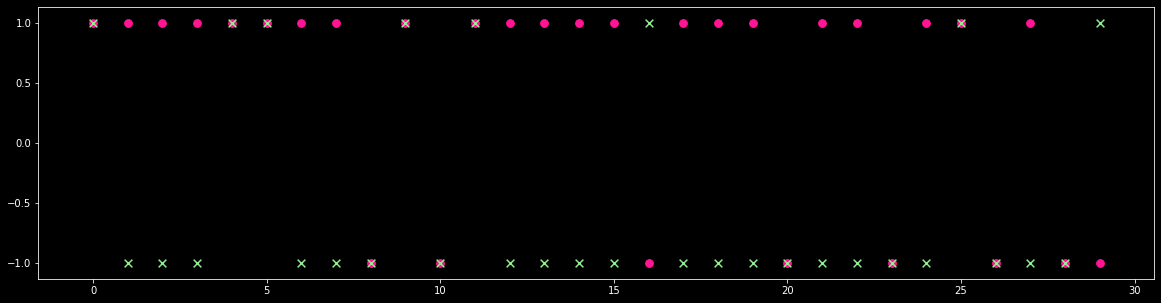

---FEATURE S: mutual_info_regression---
5


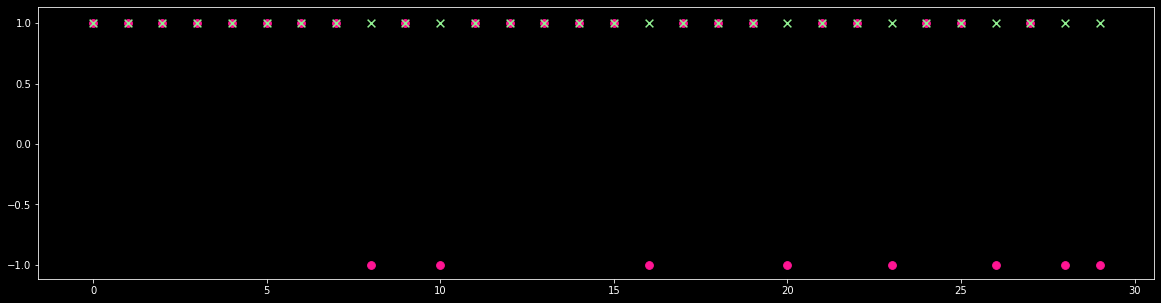

---FEATURE S: f_classif---


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 343  344  345  346  347  348  349  350  351  352  353  354  355  356
  357  358  359  360  361  362  363  364  365  366  367  368  369  370
  502 1360 1361 1531 1560] are constant.
  UserWarning)
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


5


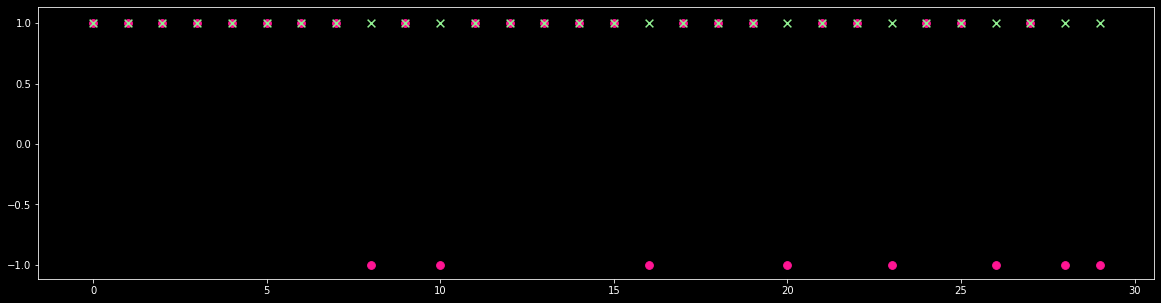

---FEATURE S: Lasso---


/Users/advikchaudhary/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7556.052447385273, tolerance: 1.5695963967173823
  positive)


5


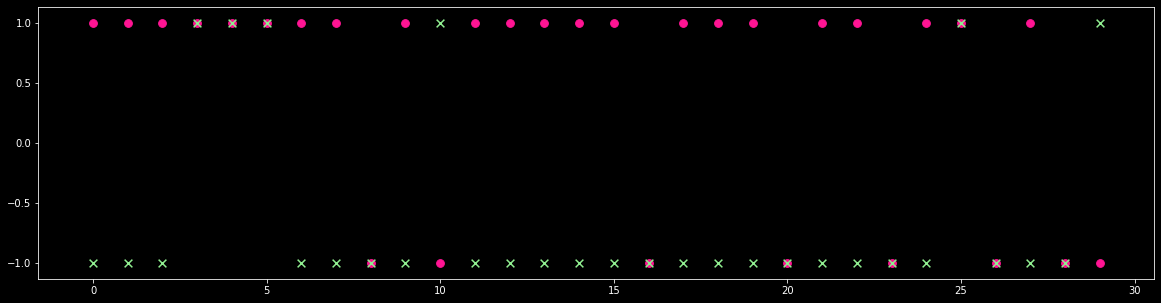

---FEATURE S: Ridge---
5


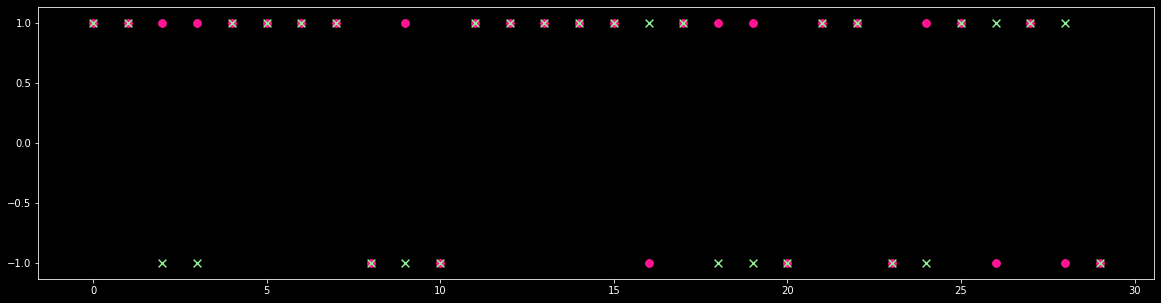

---FEATURE S: LinearRegression---
5


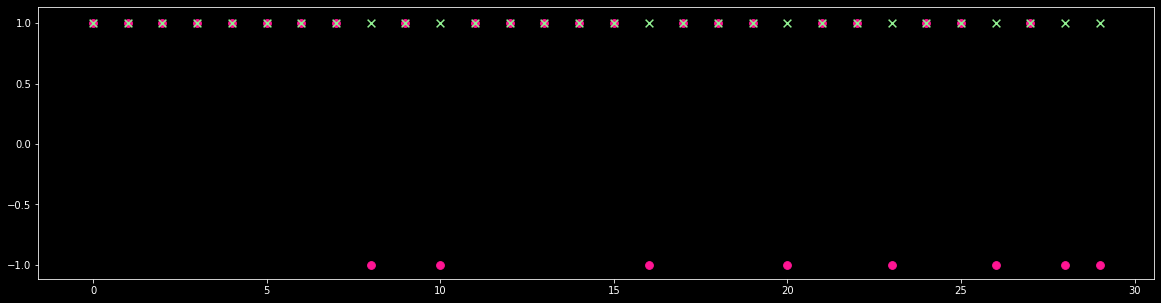

In [142]:
 for featurenum in range(len(fsel)):
    print(f"---FEATURE S: {fsel[featurenum].__name__}---")
    #Feature Selection with scikit regr SPY
    
    k=5
    
    if fsel[featurenum].__name__=='Lasso' or fsel[featurenum].__name__=='Ridge' or fsel[featurenum].__name__=='LinearRegression':
        model = SelectFromModel(estimator=fsel[featurenum](), max_features=k).fit(fdata[lnan:][:-1], data[lnan:][target].shift(-1).dropna())
        fnum=model.get_support(indices=True)
        
    else:
        selector = SelectKBest(fsel[featurenum], k)
        sf = selector.fit_transform(fdata[lnan:][:-1], data[lnan:][target].shift(-1).dropna())
        fnum = selector.get_support(indices=True) 
    
    
    #Data Splitting
    #X=fdata[f][lnan:]
    #X=fdata[mf][lnan:]
    #X=fdata[lnan:]
    #X=fdata[['ROC-2','ROC-3','ROCR-2','ROCR-3','ROCP-2','ROCP-3','MOM-2', 'ROCR100-2']]#.dropna()
    X=fdata[lnan:].iloc[:, fnum[:]].astype('float')
    #X=fdata[lnan:][['MOM 10', 'MACD HIST4', 'CORREL 3', 'PPO 6', 'MACDEXT HIST5','MACD HIST6', 'MOM 17', 'MOM 13', 'MACDEXT HIST6', 'MACDEXT HIST4']]


    tmrw=X[-1:]
    X=X[:-1]

    y=data[target][lnan:].shift(-1).dropna().astype('float')

    splitp=int(len(X)*0.75)

    X_train= X[:splitp]
    X_test = X[splitp:]
    y_train= y[:splitp]
    y_test= y[splitp:]

    #y_train=y_train.astype('int')
    #y_test=y_test.astype('int')
    print(len(X_test.columns))
    X_test.columns
    
    
    model=MLPRegressor()#svm.SVR()
    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    tpred=model.predict(tmrw)
    pred=pd.DataFrame(data=pred, index=X_test.index, columns=["Prediction"])
    tpred=pd.DataFrame(data=tpred, index=tmrw.index)
    
    ym=pd.DataFrame(index=y_test.index)
    ym['Movement']=None
    for i in range(len(y_test)):
        if y_test.iloc[i]>0:
            ym['Movement'].iloc[i]=1
        elif y_test.iloc[i]<0:
            ym['Movement'].iloc[i]=-1
        else:
            ym['Movement'].iloc[i]=0

    pm=pd.DataFrame(index=pred.index)
    pm['Movement']=None
    for i in range(len(pred['Prediction'])):
        if pred['Prediction'].iloc[i]>0:
            pm['Movement'].iloc[i]=1
        elif pred['Prediction'].iloc[i]<0:
            pm['Movement'].iloc[i]=-1
        else:
            pm['Movement'].iloc[i]=0



    plt.figure(figsize=(20,5))
    plt.scatter(np.arange(len(ym[-le:])),ym[-le:], color='deeppink', marker='o', s=60)
    plt.scatter(np.arange(len(pm[-le:])),pm[-le:], color='lightgreen', marker='x', s=60)
    plt.show()
    
    accs = {}
    for i in np.arange(0,(len(pm))-10,10):
        score=accuracy_score(pm['Movement'][i:i+10].astype('int'), ym['Movement'][i:i+10].astype('int'))
        accs.update({f"{i}-{i+10}":score})
        
    fscore['Model'].iloc[featurenum]=model
    fscore['No. Features'].iloc[featurenum]=k
    fscore['Feature S'].iloc[featurenum]=fsel[featurenum].__name__
    fscore['Deviation'].iloc[featurenum]=np.std(list(accs.values()))
    fscore['Error MAE'].iloc[featurenum]=mae(y_test, pred['Prediction'])
    fscore['Error R2'].iloc[featurenum]=r2_score(y_test, pred['Prediction'])
    fscore['Accuracy'].iloc[featurenum]=accuracy_score(pm[:-1].astype('int'), ym[:-1].astype('int'))

In [143]:
fscore.to_csv(f"FS-{ticker}-{target}.csv")

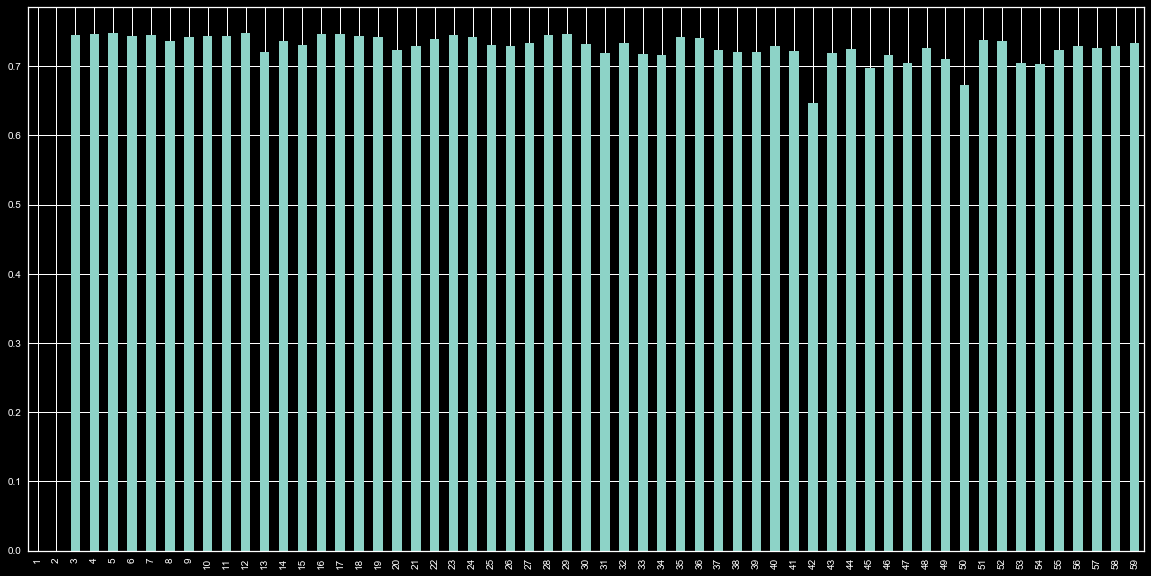

In [198]:
plt.figure(figsize=(20,10))
fscore['Accuracy'].plot(kind='bar')